## Procesamiento y análisis de los datos.

Por proceder de WebScrapping, procesar los datos es, por una vez, la más ardua de las tareas. Nos marcamos estos objetivos:

1. Extraer del precio estimado dos columnas (tipo float) con el mínimo y el máximo de la estimación. Pasar el precio de venta a tipo float y guardar en una nueva columna la 
   moneda. Pasar la fecha de la subasta a Date_time. Suele aparecer así: 2 JUL 2024 o rara vez así 3 MAR - 15 MAR 2024. Fácil.

2. De 'Nombre del artista' sacar: Nombre, Nacionalidad y Año de nacimiento. Acostumbra (ni mucho menos siempre) a presentarse así este dato:
                 
                                     'JEAN-BAPTISTE-CAMILLE COROT (PARIS 1796-1875)'

   a partir de ese formato es asequible nuestro objetivo, aunque abundan las excepciones. Procesar tantas como sea posible es el objetivo.
   
3. Usar la Descripción o la URL de las imágenes para dar una clasificación sencilla por temática de la obra: histórica, religiosa, mitológica, 
   paisaje, retrato, bodegón, costumbrismo. Sólo un IA prodigiosa o la bbdd más oportuna pueden lograrlo.      

4. Dejar técnica en una palabra: óleo, acuarela o dibujo. Ver qué hacer con tamaño, lo menos dejarlo en cm y quitar in. Tratar de detectar 
   las esculturas, muebles y vajilla que se han infiltrado. Seguramente su técnica y tamaño no encajen con el formato de los de un cuadro por lo que una vez estemops satisfechos con el procesamiento de la información restante, .dropna() resuelve este problema.

In [1]:
from roman import fromRoman
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import stats

import csv
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import re  
import requests
from bs4 import BeautifulSoup
import roman
import unidecode
import unicodedata
from PIL import Image
import requests
import io

import os

In [2]:

df = pd.read_csv('..\Datos\datos_subastas_final3trasrepesca.csv')
df.head(10)

Tema  Ciudad       Fecha Número de lote  \
0  Old Masters Part I  LONDON  2 JUL 2024          LOT 1   
1  Old Masters Part I  LONDON  2 JUL 2024          LOT 2   
2  Old Masters Part I  LONDON  2 JUL 2024          LOT 3   
3  Old Masters Part I  LONDON  2 JUL 2024          LOT 4   
4  Old Masters Part I  LONDON  2 JUL 2024          LOT 5   
5  Old Masters Part I  LONDON  2 JUL 2024          LOT 6   
6  Old Masters Part I  LONDON  2 JUL 2024          LOT 7   
7  Old Masters Part I  LONDON  2 JUL 2024          LOT 8   
8  Old Masters Part I  LONDON  2 JUL 2024          LOT 9   
9  Old Masters Part I  LONDON  2 JUL 2024         LOT 10   

                                                 URL  \
0  https://www.christies.com/en/lot/lot-6490826?l...   
1  https://www.christies.com/en/lot/lot-6490827?l...   
2  https://www.christies.com/en/lot/lot-6490828?l...   
3  https://www.christies.com/en/lot/lot-6490829?l...   
4  https://www.christies.com/en/lot/lot-6490830?l...   
5  https://www.christies.com/en/lot/lot-6490831?l...   
6  https://www.christies.com/en/lot/lot-6490832?l...   
7  https://www.christies.com/en/lot/lot-6490833?l...   
8  https://www.christies.com/en/lot/lot-6490834?l...   
9  https://www.christies.com/en/lot/lot-6490835?l...   

                                         Descripción  \
0   Double portrait of a married couple, half-length   
1                          Saint Jerome in his study   
2  Portrait of Queen Elizabeth I (1533-1603), bus...   
3                        The Madonna of the Cherries   
4      Saint Anthony of Padua with the Infant Christ   
5        A triptych depicting the Betrayal of Christ   
6                              The Madonna and Child   
7                  The Rest on the Flight into Egypt   
8    The Triumph of Love and the Triumph of Chastity   
9  A standing man turning to the left with outstr...   

                                  Nombre del artista  \
0        GABRIEL ZEHENDER (ACTIVE BASEL, C. 1527-35)   
1  PIETER COECKE VAN AELST I (AALST 1502-1550 BRU...   
2   ATTRIBUTED TO GEORGE GOWER (LONDON C. 1538-1596)   
3        QUENTIN METSYS (LEUVEN 1465/6-1530 ANTWERP)   
4  MASTER OF THE LEGEND OF SAINT LUCY (ACTIVE BRU...   
5  ATTRIBUTED TO THE MONVAERNI MASTER (ACTIVE LIM...   
6  MASTER OF MONTE OLIVETO (ACTIVE SIENA, C. 1305...   
7  TIZIANO VECELLIO, CALLED TITIAN (PIEVE DI CADO...   
8  MASTER OF THE LANDAU FINALY TRIUMPHS (ACTIVE F...   
9             ALESSANDRO ALLORI (FLORENCE 1535-1607)   

               Precio estimado Precio de venta  \
0        GBP 100,000 - 150,000     GBP 352,800   
1        GBP 150,000 - 200,000     GBP 680,400   
2        GBP 300,000 - 500,000     GBP 907,200   
3   GBP 8,000,000 - 12,000,000  GBP 10,660,000   
4        GBP 300,000 - 500,000     GBP 504,000   
5        GBP 200,000 - 300,000     GBP 441,000   
6      GBP 800,000 - 1,200,000   GBP 1,008,000   
7  GBP 15,000,000 - 25,000,000  GBP 17,560,000   
8        GBP 400,000 - 600,000     GBP 478,800   
9        GBP 200,000 - 300,000     GBP 239,400   

                                          URL imagen  ...  \
0  https://www.christies.com/img/lotimages/2024/C...  ...   
1  https://www.christies.com/img/lotimages/2024/C...  ...   
2  https://www.christies.com/img/lotimages/2024/C...  ...   
3  https://www.christies.com/img/lotimages/2024/C...  ...   
4  https://www.christies.com/img/lotimages/2024/C...  ...   
5  https://www.christies.com/img/lotimages/2024/C...  ...   
6  https://www.christies.com/img/lotimages/2024/C...  ...   
7  https://www.christies.com/img/lotimages/2024/C...  ...   
8  https://www.christies.com/img/lotimages/2024/C...  ...   
9  https://www.christies.com/img/lotimages/2024/C...  ...   

                                                 AP0  \
0  Walter Rickards, M.D., by 1888 (according to a...   
1  Private Collection, Holland, and by descent to...   
2  Alfred Morrison (1821-1897), Fonthill House, T...   
3  Anonymous sale [From the Château de La Muette,...   
4 

In [3]:
df.isnull().sum()

Tema                    64
Ciudad                   0
Fecha                    0
Número de lote          69
URL                      0
Descripción             74
Nombre del artista      69
Precio estimado         69
Precio de venta         62
URL imagen               0
Técnica                 65
Tamaño                  27
AP0                   1312
AP1                   3183
AP2                   4627
AP3                   5571
AP4                   6281
AP5                   6733
AP6                   7069
AP7                   7301
AP8                   7441
AP9                   7561
dtype: int64

### 1.1. Trabajemos el dato del precio.


        <+>. Creamos nuevas columnas para almacenar la información procesada.
        

In [4]:
df['Mínimo estimado']=None
df['Máximo estimado']=None
df['Precio_num']=None
df['Moneda']= None

In [5]:
for x in df[df['Ciudad']=='NEW YORK']['Precio estimado'][:3]:
    print(x)

USD 25,000 - 35,000
USD 50,000 - 70,000
USD 40,000 - 60,000


      <+>. Definimos funciones para rellenarlas 

In [6]:
def moneda(precioest):
    if not isinstance(precioest, str): #Rompiendo la cadena encontramos la moneda en el primer lugar.
        return None    
    try:
        return precioest.split()[0]
    except:
        return None

def est_min(precioest):
    if not isinstance(precioest, str): #El mínimo del intervalo es el siguiente valor y sucesivamente. Antes de pasar a float el dato debemos deshacernos de la ','
        return None
    try:
        return float(precioest.split()[1].replace(',', ''))
    except: 
        return None

def est_max(precioest):
    if not isinstance(precioest, str):
        return None
    try:    
        return float(precioest.split()[-1].replace(',', ''))
    except:
        return None

def precio_a_float(precio):
    if not isinstance(precio, str):
        return None    
    try:
        return float(precio.split()[-1].replace(',', ''))
    except:
        return None    

In [7]:
df['Mínimo estimado']=df['Precio estimado'].apply(est_min)
df['Máximo estimado']=df['Precio estimado'].apply(est_max)
df['Precio_num']=df['Precio de venta'].apply(precio_a_float)
df['Moneda']= df['Precio estimado'].apply(moneda)

1.2. Fecha a datetime, cuando una subasta tiene lugar en dos días, por convenio, elegimos el primero. Esto puede aparecer en formato 14–21 NOV 2019 
    o como 27 NOV – 5 DEC 2019.

In [8]:
fecha='27 NOV – 5 DEC 2019'
fecha2 = '14–21 NOV 2019'
print((fecha.split(' ')[0]).split('–')[0]+ ' ' + fecha.split()[1] + ' ' + fecha.split()[-1])
print((fecha2.split(' ')[0]).split('–')[0]+ ' ' + fecha2.split()[1] + ' ' + fecha2.split()[-1])

27 NOV 2019
14 NOV 2019


In [9]:
def extraer_fecha(fecha):
    return (fecha.split()[0]).split('–')[0] + ' ' + fecha.split()[1] + ' ' + fecha.split()[-1]  


df['Fecha'] = df['Fecha'].apply(extraer_fecha)
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d %b %Y', errors='coerce')

2. La mayor parte de las veces nos encontraremos con una expresión tipo : 'Luca Giordano (Naples 1635-1705)'. Trataremos por separado la obtención de cada nuevo dato. 
    Variaciones frecuentes son: 
            
            a1).   'Sir Edward Coley Burne-Jones, Bart., A.R.A., R.W.S. (British, 1833-1898)'
            a2).   'Attributed to Benedetto Gennari (Cento 1633-1715 Bologna)'    
            b1).   'Pietro Paolo Agapiti (Sassoferrato, c. 1470-c. 1540 Cupramontana)'
            c).    'Bartolomé Esteban Murillo (Seville 1618-1682) and Studio'
            d1).   'English School, 16th century', 'Tuscan School, 13th century', ...
            d2).   'ÉCOLE FRANÇAISE DU XVIIIE SIÈCLE' 



In [10]:
for x in df['Nombre del artista'][:20]:
    print(x)

GABRIEL ZEHENDER (ACTIVE BASEL, C. 1527-35)
PIETER COECKE VAN AELST I (AALST 1502-1550 BRUSSELS)
ATTRIBUTED TO GEORGE GOWER (LONDON C. 1538-1596)
QUENTIN METSYS (LEUVEN 1465/6-1530 ANTWERP)
MASTER OF THE LEGEND OF SAINT LUCY (ACTIVE BRUGES, C . 1470-1500)
ATTRIBUTED TO THE MONVAERNI MASTER (ACTIVE LIMOGES, C. 1461-85)
MASTER OF MONTE OLIVETO (ACTIVE SIENA, C. 1305-35)
TIZIANO VECELLIO, CALLED TITIAN (PIEVE DI CADORE C. 1485/90-1576 VENICE)
MASTER OF THE LANDAU FINALY TRIUMPHS (ACTIVE FLORENCE, C. 1440-60)
ALESSANDRO ALLORI (FLORENCE 1535-1607)
CIRCLE OF FRANCESCO DI GIORGIO MARTINI (SIENA 1439-1501)
GIOVANNI PIETRO RIZZOLI, CALLED GIAMPIETRINO (ACTIVE MILAN, C. 1495-1550)
BALTHASAR VAN DER AST (MIDDLEBURG 1593-1657 DELFT)
AERT VAN DER NEER (GORINCHEM 1603-1677 AMSTERDAM)
PIETER BRUEGHEL THE YOUNGER (BRUSSELS 1564-1638 ANTWERP)
JACOB GRIMMER (ANTWERP 1525-1590)
FRANS HALS (ANTWERP 1582/3-1666 HAARLEM)
SIR PETER LELY (SOEST, WESTPHALIA 1618-1680 LONDON) AND STUDIO
GEORGE STUBBS, A.R.A. (

Nuevas columnas para alojar la información a obtener. Empezaremos extrayendo el año de nacimiento.

In [11]:
df['preNombre']= None 
df['Año de nacimiento'] = None 
df['País']= None 

In [12]:

#Nos quedamos con la primera parte del texto, la que antecede al paréntesis, en una nueva columna para posterior procesamiento.
def extraer_prenombre(info):
    if not isinstance(info, str):
        return None
    return info.split('(')[0]

#El dato del año puede aparecer en años o en siglos, si lo dan en siglos tomaremos como año de nacimiento el año 50 del siglo correspondiente.
#La siguiente función comprueba si una cadena esta compuesta sólo por las letras X,V,I; que son las necesarias para expresar los siglos (hasta el 39) en números romanos.
def solo_XVI(cadena):  
    for letra in cadena:
        if letra not in 'XVI':
            return False
    return True


def extraer_año(info):
    if not isinstance(info, str): #Nos aseguramos de recibir como entrada un str, si no nada.
        return None

    for i in range(len(info)-3): #El primer dígito al que le sucedan 3 más será el año de nacimiento.
        if info[i].isdigit() and info[i+1:i+4].isdigit():
            return int(info[i:i+4])
            
        
    info=info.upper() #De otro modo buscamos la información en siglos
    
    for i in range(len(info) - 1): #Buscamos dos dígitos consecutivos seguidos por th (ordinal en inglés), nos quedamos con el año 50 del correspondiente siglo.
        if info[i].isdigit() and info[i+1].isdigit() and info[i+2] == 'T' and info[i+3] == 'H':
            siglo = int(info[i:i+2])
            return (siglo - 1) * 100 + 50
        
        
    for i in range(len(info) - 3): #Buscamos la cadena solo_XVI más larga posible a la que le suceda EME (ordinal en francés) o su abreviatura, XIXEME o XIXe S(iecle)
        if i + 3 < len(info):
            if solo_XVI(info[i]) and unidecode.unidecode(info[i + 1]) == 'E'  and (info[i + 2] == ' ' or info[i + 2] == 'M') and (info[i + 3] == 'S' or info[i + 3] == 'E'):
                j = i
                while j > 0 and solo_XVI(info[j - 1]) and solo_XVI(info[j:i + 1]):
                    j -= 1
                roman_numerals = info[j:i + 1]
                try:
                    return (fromRoman(roman_numerals) - 1) * 100 + 50
                except:
                    pass
            
    return None



Rellenamos las nuevas columna... 

In [13]:
df['preNombre'] = df['Nombre del artista'].apply(extraer_prenombre)
df['Año de nacimiento'] = df['Nombre del artista'].apply(extraer_año)

In [14]:
info = 'JEAN-BAPTISTE LE PRINCE (METZ 1734-1781 SAINT-DENIS-DU-PORT)'
print(extraer_prenombre(info))
print(extraer_año(info))


JEAN-BAPTISTE LE PRINCE 
1734


In [15]:
info='HANS ROTTENHAMMER (MUNICH 1564/65-1625 AUGSBOURG)'
print(extraer_prenombre(info))
print(extraer_año(info))

HANS ROTTENHAMMER 
1564


In [16]:
info='ÉCOLE FRANÇAISE DU XXE SIÈCLE '
print(extraer_prenombre(info))
print(extraer_año(info))


ÉCOLE FRANÇAISE DU XXE SIÈCLE 
1950


In [17]:
info='asfgasiucbiasubfiu 17th'
print(extraer_prenombre(info))
print(extraer_año(info))

asfgasiucbiasubfiu 17th
1650


In [18]:
info='PIERRE BREBIETTE (MANDRES, VERS 1598 ? -1642 PARIS)'
print(extraer_prenombre(info))
print(extraer_año(info))

PIERRE BREBIETTE 
1598


In [19]:
info='Jasper Johns (b. 1930)'
print(extraer_prenombre(info))
print(extraer_año(info))

Jasper Johns 
1930


In [20]:
info='asfgasiucbiasubfiu 17TH hJSVu'
print(extraer_prenombre(info))
print(extraer_año(info))

asfgasiucbiasubfiu 17TH hJSVu
1650


In [21]:
info='Jean-Léon Gérôme (FRENCH, 1824–1904)'
print(extraer_prenombre(info))
print(extraer_año(info))

Jean-Léon Gérôme 
1824


Esta es la definición original sin depurar de la función extraer_año. Al compararla con la nueva versión encontramos algo chocante ¿?

In [22]:
df['Año de nacimiento1'] = None 

def extraer_año1(info):
    if not isinstance(info, str):
        return None

    for i in range(len(info)-3):
        if info[i].isdigit() and info[i+1:i+4].isdigit():
            return int(info[i:i+4])
            
    for i in range(len(info) - 1):

        if info[i].isdigit() and info[i+1].isdigit() and (info[i+2] == 't') and info[i+3] == 'h':
            siglo = int(info[i:i+2])
            return (siglo - 1) * 100 + 50
        
        if info[i].isdigit() and info[i+1].isdigit() and info[i+2] == 'T' and info[i+3] == 'H':
            siglo = int(info[i:i+2])
            return (siglo - 1) * 100 + 50
        
        if 'b. ' in info:
            start_idx = info.index('b. ') + 3
            end_idx = start_idx + 4
            birth_year = info[start_idx:end_idx]
            return birth_year
        
    for i in range(len(info) - 3):
        if i + 3 < len(info):
            if info[i].isupper() and (info[i + 1] == 'E' or info[i + 1] == 'e') and info[i + 2] == ' ' and info[i + 3] == 'S':
                j = i
                while j > 0 and info[j - 1].isupper() and solo_XVI(info[j:i + 1]):
                    j -= 1
                roman_numerals = info[j:i + 1]
                try:
                    return (fromRoman(roman_numerals) - 1) * 100 + 50
                except:
                    pass
            
    return None


df['Año de nacimiento1'] = df['Nombre del artista'].apply(extraer_año1)

In [23]:
cols=['Año de nacimiento', 'Año de nacimiento1']
df[cols].isnull().sum()

Año de nacimiento     510
Año de nacimiento1    501
dtype: int64

Tras mejorar la definición de la función extraer_año resulta que la nueva función produce más nulos que la antigua. Veamos dónde es que difieren.

In [24]:
for i, row in df[(df['Año de nacimiento'].isnull()) & (~df['Año de nacimiento1'].isnull())].iterrows():
    print(df.loc[i,'Nombre del artista'], '--------->', df.loc[i,'Año de nacimiento1'])

TÊTE DE SATYRE ---------> 49950.0
LE TRIOMPHE DE SILÈNE ---------> 49950.0
FIGURE REPRÉSENTANT UNE SAINTE FEMME, PROBABLEMENT MARIE-MADELEINE ---------> -50.0
DEUX CULOTS REPRÉSENTANT DES TÊTES DE SOLDATS ---------> 49950.0
BAS-RELIEF REPRÉSENTANT LA TÊTE DE SAINT JEAN-BAPTISTE PORTÉE PAR DES ANGES ---------> 49950.0
PAIRE DE SALIÈRES ---------> 49950.0
FIGURE DE FEMME OU DE SAINTE FEMME TENANT UN LIVRE ---------> 49950.0
MEMENTO MORI REPRÉSENTANT UN CRÂNE SUR UN LIVRE ---------> -50.0
MEMENTO MORI REPRÉSENTANT UN CRÂNE SUR UN LIVRE ---------> -50.0
MEMENTO MORI REPRÉSENTANT UN CRÂNE SUR UN LIVRE ---------> -50.0
MANNER OF DIEGO RODRÍGUEZ DE SILVA Y VELÁZQUEZ ---------> 49950.0
FOLLOWER OF DIEGO RODRÍGUEZ DE SILVA Y VELÁZQUEZ ---------> 49950.0
GROUPE EN CHÊNE SCULPTÉ REPRÉSENTANT LA DÉPOSITION DU CHRIST ---------> -50.0


Ni la más remota idea de qué pasa, en principio debería devolver None en todos estos casos pero... 

Nos quedamos con el resultado producido por la 2ª versión.

In [25]:
df=df.drop(columns='Año de nacimiento1')

In [26]:
df = df.dropna(subset=['Tema', 'Nombre del artista', 'Precio estimado', 'Descripción', 'Número de lote'])
df.isnull().sum()

Tema                     0
Ciudad                   0
Fecha                    0
Número de lote           0
URL                      0
Descripción              0
Nombre del artista       0
Precio estimado          0
Precio de venta          0
URL imagen               0
Técnica                 63
Tamaño                  25
AP0                   1298
AP1                   3161
AP2                   4580
AP3                   5500
AP4                   6193
AP5                   6624
AP6                   6951
AP7                   7178
AP8                   7317
AP9                   7430
Mínimo estimado         25
Máximo estimado         25
Precio_num             771
Moneda                   0
preNombre                0
Año de nacimiento      424
País                  7620
dtype: int64

Para recuperar el pais construimos un diccionario con el nombre de las principales ciudades y el gentilicicio en varios idiomas de los paises de Europa y de EEUU en varios idiomas con la esperanza de encontrar coincidencias con la info del artista que nos permitan determinar su nacionalidad.

In [27]:
paises = {
    'Alemania': {
        'Nombre': ['Germany', 'Allemagne'],
        'Ciudades': [
            'Berlin', 'Hamburg', 'Munich', 'Frankfurt', 'Cologne', 'Dusseldorf', 'Swabia', 'Franconia',
            'Stuttgart', 'Dortmund', 'Essen', 'Leipzig', 'Bremen', 'Dresden', 
            'Hannover', 'Nuremberg', 'Weimar', 'Kronach', 'Augsburg', 'Erlangen', 
            'Greifswald', 'Heidelberg', 'Breslau', 'Hambourg', 'Francfort', 
            'Dortmund', 'Brême', 'Dresde', 'Haina', 'KARLSRUHE', 'BERNAU','Breisach',
            'Hanovre', 'Nuremberg',  'Augsbourg', 'Konstanz', 'NÖRDLINGEN', 'Colmar',
            'Heidelberg', 'Breslau', 'Prenzlau', 'MAYENCE', 'HILDBURGHAUSEN'
        ],
        'Gentilicio': ['German', 'Deutsch', 'Allemand', 'Allemande']
    },
    
    'España': {
        'Nombre': [ 'Spain', 'Espagne'],
        'Ciudades': [ 'Gibraltar', 'Oviedo', 'Aragon', 'Badajoz', 'XÀTIVA', 
            'Madrid', 'Barcelona', 'Valencia', 'Seville', 'Bilbao', 'Malaga', 'Castellon',
            'Zaragoza', 'Murcia', 'Palma', 'Las Palmas', 'Alicante', 'Cordoba', 
            'Valladolid', 'Vigo', 'Granada', 'Toledo', 'Santander', 'San Sebastián', 
            'Segovia', 'Burgos', 'Salamanca', 'Barcelone', 'Valence', 'Séville', 'Murcie', 'Cordoue', 
            'Valladolid', 'Vigo', 'Grenade', 'Tolède', 'Santander', 'San Sebastián', 
            'Ségovie', 'Salamanque'
        ],
        'Gentilicio': ['Spanish',  'Español',  'Espagnol', 'Espagnole']
    },
    
    'Italia': {
        'Nombre': ['Italy', 'Italie'],
        'Ciudades': [
            'Rome', 'Milan', 'Naples', 'Florence', 'Venice', 'Turin', 'Veneto', 'Canale di', 'Serino', 'ALESSANDRIA', 'Vicenza', 'Bergamo',
            'Bologna', 'Genoa', 'Padua', 'Palermo', 'Bari', 'Verona', 'Messina', 'MODENA', 'NOVELLARA', 'COMUNANZA', 'BARRA', 'Barletta',
            'Trieste', 'Parma', 'Lucca', 'Mantua', 'Ferrara', 'Siena', 'Parma', 'San Vito', 'Tarcento', 'Vilminore', 'Lugano', 'Carona',
            'Pesaro', 'Brescia', 'Bologne', 'Genove', 'Pisa', 'Empoli', 'Taverna', 'Calabria', 'Sassoferrato', 'NAPOLI', 'CALVI', 'Capri',
            'Ravenna', 'Urbino', 'Alagna', 'Morazzone', 'Cantiano', 'Andorno', 'Scaria', 'icenza', 'BELLUNO', 'ROVIGO', 'TREVIGLIO', 'TUSCANY',
            'MILANO', 'LARCIANO', 'Treviso', 'Fontignano', 'Arezzo', 'Dumenza', 'Orzinuovi', 'San Gimignano', 'SARAGOSSA', 'Bohemia', 'Faenza',
            'CREMONA', 'LUINI', 'ANCONA', 'VÉNÉTIE', 'CRÉMONE', 'Caviola', 'BOLONAISE', 'ISOLA MANTEGNA', 'Perugia', 'Bergamo ', 'Maltese', 'Castiglione di'
            'CRÉMONE', 'SAN GIOVANNI', 'UDINE', 'Venise', 'GABELLA', 'BERGAME', 'GÈNES', 'VERCELLI', 'ALGER', 'PARME', 'San Gimignano', 'PERUGIA',
            'EPPAN', 'FIESOLE', 'LIVORNO', 'MONCALVO', 'ANCHIANO', 'PIEVE DI', 'SOLIGO', 'TERRANUOVA BRACCIOLINI', 'LE MARCHE', 'Cortona'
        ],
        'Gentilicio': ['Italian', 'Italiano', 'Italien', 'Italienne', 'Genoese', 'Génois', 'Génoise', 
            'Roman','FLORENTINE', 'TUSCAN', 'SICILIAN', 'VENETIAN', 'BOLOGNESE', 'Lombard', 'Sienese']
    },
    
    'Reino Unido': {
        'Nombre': ['United Kingdom',  'Angleterre', 'England', 'GRANDE-BRETAGNE', 'WALES', 'GREAT BRITAIN', 'SCOTLAND'],
        'Ciudades': [
            'London', 'Manchester', 'Birmingham', 'Glasgow', 'Liverpool', 'Edinburgh', 'NORTHUMBERLAND', 'NORTHAMPTON', 'CARNARVONSHIRE', 'ISLEWORTH',
            'Bristol', 'Leeds', 'Sheffield', 'Newcastle', 'Nottingham', 'Leicester', 'Dorset', 'Dorchester','WHITFORD', 'DUNDEE',
            'Cardiff', 'Belfast', 'Brighton', 'Aberdeen', 'Southampton', 'Oxford', 'Lancashire', 'Exeter', 'WORCESTER', 'BLACKFRIARS', 'GUILDFORD',
            'Cambridge', 'Bath', 'Norwich', 'Blackpool', 'Londres', 'Édimbourg', 'Teignmouth','Knutsford', 'Cheshire', 'Chiswick', 'Thrussington',
            'Exeter', 'DALTON-IN-FURNESS', 'SCARBOROUGH', 'MAIDSTONE', 'Corton', 'Twickenham', 'Devonshire', 'Eccles', 'Helensburgh', 'MIDDLEBURG'
        ],
        'Gentilicio': ['British',  'Britannique', 'Britannique',  'Britannique', 'Scottish', 'English']
    },
    'Estados Unidos': {
        'Nombre': ['United States',  'États-Unis'],
        'Ciudades': [
            'New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'San Francisco',
            'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose', 
            'Austin', 'Jacksonville', 'Fort Worth', 'Boston', 'Denver', 'San Diego', 
            'Seattle', 'Atlanta', 'Detroit', 'Nashville', 'Springfield'
        ],
        'Gentilicio': ['American',  'Americano',  'Américain',  'Américaine']
    },
    'Paises Bajos': {
        'Nombre': ['Netherlands', 'Pays-Bas', 'Hollande'],
        'Ciudades': [
            'Amsterdam', 'Rotterdam', 'The Hague', 'Utrecht', 'Eindhoven', 'Groningen','WASSENAAR', 
            'Tilburg', 'Nijmegen', 'Enschede', 'Leiden', 'Maastricht', 'Dordrecht', 's-Hertogenbosch',
            'Zwolle', 'Breda', 'Arnhem', 'Haarlem', 'Delft', 'Deventer', 'Leeuwarden', 'Emmen',
            'La Haye', 'Groningue', 'LA HAGUE', 'Horn', 'Enkhuizen', 'Konstanz', 'Hertogenbosch', 'Gorkum',
            'Nimègue', 'Enschede', 'Leyde',  'Middelburg', 'Arnemuiden', 'Heusden', 'Hoorn', 'URTECHT',
            'Bréda', 'Arnhem', 'OVERSCHIE', 'LATTROP', 'FLANDRES', 'HELMOND', 'SCHIEDAM', 'ELFSHAVEN'
        ],
        'Gentilicio': ['Dutch', 'Neerlandés', 'Néerlandais',  'Néerlandaise',  'Hollandais',  
            'Hollandaise', 'Flemish', 'FLAMANDE', 'NETHERLANDISH']
    },
    'Bélgica': {
        'Nombre': ['Belgium', 'Belgique'],
        'Ciudades': [
            'Brussels', 'Antwerp', 'Ghent', 'Bruges', 'Leuven', 'Liege',
            'Namur', 'Charleroi', 'Mons', 'Mechelen', 'Aalst', 'La Louviere', 
            'Kortrijk', 'Hasselt', 'Ostend', 'Tournai', 'Ypres', 'Genk', 'Knokke',
            'Bruxelles', 'Anvers', 'Gand', 'Louvain', 'Liège',
            'Malines', 'Alost', 'La Louvière', 
            'Courtrai', 'Ostende'
        ],
        'Gentilicio': [ 'Belgian', 'Belge',  'Belge',  'Belge']
    },
    'Francia': {
        'Nombre': ['France', 'France'],
        'Ciudades': [
            'Paris', 'Marseille', 'Lyon', 'Toulouse', 'Strasbourg', 'Nice', 'Bordeaux', 'Colombes', 'Saint-Nicolas', 
            'Lille', 'Rennes', 'Reims', 'Le Havre', 'Saint-Etienne', 'Nantes', 'Tournon-sur-Rhône', 'DAMMARTIN', 
            'Strasbourg', 'Montpellier', 'Clermont-Ferrand', 'Versailles', 'Lunéville', 'STRASBOURG', 
            'Metz', 'Grenoble', 'Avignon', 'Rouen', 'Limoges', 'La Rochelle', 'Vaugirard', 'Lombardy', 
            'LISIEUX', 'CARPENTRAS', 'NÎMES', 'POITIERS', 'VERS', 'VALENCIENNES', 'GRUCHY', 'AVALLON', 'POULTOUSK',
            'BOURGES', 'ISSOUDUN', 'Aix-en-Provence', 'DIJON', 'NEUILLY-SUR-INDRE', 'MONTARGIS', 'NANCY', 'TOURNUS', 
            'MONTRELAIS', 'CONCARNEAU', 'LIBOURNE', 'SENLIS', 'VILLIERS-LE-BEL', 'Vichy', 'Marseilles', 'Saint-Germain-en-Laye'
        ],
        'Gentilicio': ['French', 'Français', 'Française']
    },    
    'Suiza': {
        'Nombre': [ 'Switzerland', 'Suisse'],
        'Ciudades': ['Basel', 'Zurich', 'Geneva', 'Bern', 'Lausanne', 'Lucerne', 'Baden', 'Zug', 'Winterthur', 'Aarau',
        'Bâle', 'Genève', 'Berne', 'Lucerne', 'Zoug', 'Winterthour'],
        'Gentilicio': [ 'Swiss', 'Suizo', 'Suisse',  'Suisse']
    },
    'Macao': {
        'Nombre': [ 'Macau', 'Macao'],
        'Ciudades': ['Macao'],
        'Gentilicio': ['Macanese', 'Macanais',  'Macanaise']
    },
    'Suecia': {
        'Nombre': ['Sweden', 'Suède'],
        'Ciudades': [
            'Stockholm', 'Gothenburg', 'Malmo', 'Uppsala', 'Vasteras', 'Orebro',
            'Linkoping', 'Helsingborg', 'Huddinge', 'Jonkoping', 'Norrkoping', 
            'Lund', 'Umea', 'Gavle', 'Boras', 'Eskilstuna', 'Sodertalje', 
            'Karlstad', 'Taby'
        ],
        'Gentilicio': ['Swedish', 'Sueco', 'Suédois', 'Suédoise']
    },
    'Austria': {
        'Nombre': ['Austria', 'Autriche'],
        'Ciudades': [
            'Vienna', 'Graz', 'Linz', 'Salzburg', 'Innsbruck', 'Klagenfurt', 
            'Villach', 'Wels', 'Sankt Polten', 'Dornbirn', 'Wiener Neustadt', 
            'Steyr', 'Feldkirch', 'Bregenz', 'Leonding', 'Klosterneuburg',
            'Vienne', 'Salzbourg', 'Sankt Pölten'
        ],
        'Gentilicio': ['Austrian', 'Austriaco',  'Autrichien',  'Autrichienne']
    },
    'Dinamarca': {
        'Nombre': ['Denmark', 'Danemark'],
        'Ciudades': [
            'Copenhagen', 'Aarhus', 'Odense', 'Aalborg', 'Esbjerg', 'Randers', 
            'Kolding', 'Horsens', 'Vejle', 'Roskilde', 'Hillerod', 'Naestved', 
            'Frederikshavn', 'Silkeborg', 'Tarnby', 'Slagelse', 'Hjorring', 
            'Holstebro', 'Fredericia', 'Haderslev'
        ],
        'Gentilicio': [ 'Danish', 'Danés', 'Danois', 'Danoise']
    },
    'Irlanda': {
        'Nombre': ['Ireland', 'Irlande'],
        'Ciudades': [
            'Dublin', 'Cork', 'Galway', 'Limerick', 'Waterford', 'Drogheda',
            'Dundalk', 'Bray', 'Tralee', 'Kilkenny', 'Sligo', 'Wexford', 
            'Letterkenny', 'Athlone', 'Ennis', 'Killarney', 'Naas', 'Mullingar',
            'Navan', 'Balbriggan', 'Shannon', 'Wicklow'
        ],
        'Gentilicio': ['Irish', 'Irlandais', 'Irlandaise']
    },

    'Rusia': {
        'Nombre': ['Russia', 'Russie'],
        'Ciudades': [
            'Saint Petersburg', 'Moscow', 'Novosibirsk', 'Yekaterinburg', 'Nizhny Novgorod',
            'Kazan', 'Chelyabinsk', 'Omsk', 'Samara', 'Rostov-on-Don', 
            'Volgograd', 'Ufa','ST. PETERSBURG', 'SAINT-PÉTERSBOURG', 'Kiev'
        ],
        'Gentilicio': ['Russian', 'Russe']
    },

    'Republica Checa': {
        'Nombre': ['Czech Republic', 'République tchèque', 'CZECHOSLOVAKIA'],
        'Ciudades': [
            'Prague','Brno','Ostrava','Plzeň','Liberec','Olomouc','České Budějovice','Hradec Králové',
            'Ústí nad Labem','Pardubice','Zlín', 'Kuttenberg', 'OLMÜTZ'
        ],
        'Gentilicio': ['Czech', 'Tchèque', 'Czechoslovakian']
    },
    'Grecia': {
        'Nombre': ['Greece', 'Grèce'],
        'Ciudades': [
            'Athens', 'Thessaloniki', 'Patras', 'Heraklion', 'Larissa', 'Volos', 'HERAKLEION',
            'Rhodes', 'Ioannina', 'Chania', 'Kalamata', 'Tripoli', 'Corinth', 
            'Sparta', 'Pylos', 'Zakynthos', 'Kavala', 'Mytilene', 'Kos', 'Chios'
        ],
        'Gentilicio': ['Greek', 'Grec', 'Grecque']
    },
    'Noruega': {
        'Nombre': ['Norway', 'Norvège'],
        'Ciudades': [
            'Oslo', 'Bergen', 'Stavanger', 'Trondheim', 'Drammen', 'Fredrikstad',
            'Kristiansand', 'Ålesund', 'Tønsberg', 'Moss', 'Sandefjord', 'Porsgrunn', 
            'Skien', 'Arendal', 'Bodø', 'Haugesund', 'Tromsø', 'Hamar', 'Halden', 'Larvik'
        ],
        'Gentilicio': ['Norwegian', 'Norvégien', 'Norvégienne']
    },
    'Dinamarca': {
        'Nombre': ['Denmark', 'Danemark'],
        'Ciudades': [
            'Copenhagen', 'Aarhus', 'Odense', 'Aalborg', 'Esbjerg', 'Randers', 'HELSINGØR',
            'Kolding', 'Horsens', 'Vejle', 'Roskilde', 'Hillerod', 'Naestved', 'SANKT JØRGENSBJERG',
            'Frederikshavn', 'Silkeborg', 'Tarnby', 'Slagelse', 'Hjorring', 'FREDENSBORG',
            'Holstebro', 'Fredericia', 'Haderslev', 'BALDERSBRØNDE'
        ],
        'Gentilicio': ['Danish', 'Danés', 'Danois', 'Danoise', 'SCANDINAVIAN']
    },
    'Hungría': {
        'Nombre': ['Hungary', 'Hongrie'],
        'Ciudades': [
            'Budapest', 'Debrecen', 'Szeged', 'Miskolc', 'Pécs', 'Győr',
            'Nyiregyhaza', 'Kecskemét', 'Székesfehérvár', 'Szombathely', 'Szolnok', 
            'Tatabánya', 'Kaposvár', 'Érd', 'Veszprém', 'Békéscsaba', 'Eger', 'Ózd'
        ],
        'Gentilicio': ['Hungarian', 'Hongrois', 'Hongroise']
    },
    'Polonia': {
        'Nombre': ['Poland', 'Pologne'],
        'Ciudades': [
            'Varsovia', 'Cracovia', 'Łódź', 'Wrocław', 'Poznań', 'Gdańsk',
            'Szczecin', 'Bydgoszcz', 'Lublin', 'Katowice', 'Białystok', 'Gdynia', 
            'Częstochowa', 'Sosnowiec', 'Radom', 'Toruń', 'Kielce', 'Gliwice', 'Zabrze'
        ],
        'Gentilicio': ['Polish', 'Polonais', 'Polonaise'],
    },
    'Finlandia': {
        'Nombre': ['Finland', 'Finlande'],
        'Ciudades': [
            'Helsinki', 'Espoo', 'Tampere', 'Vantaa', 'Oulu', 'Turku',
            'Jyväskylä', 'Lahti', 'Kuopio', 'Pori', 'Kotka', 'Lappeenranta', 
            'Vaasa', 'Kajaani', 'Seinäjoki', 'Rovaniemi', 'Mikkeli', 'Iisalmi', 'Hämeenlinna'
        ],
        'Gentilicio': ['Finnish', 'Finlandais', 'Finlandaise']
    }

}


In [28]:
def quitar_tildes(texto):
    return unidecode.unidecode(texto)

def extraer_nacionalidad(info):
    if not isinstance(info, str):
        return 'Desconocido'
    
    info=info.replace(",", ", ")
    # Quitar tildes y convertir a mayúscula
    info_procesada = quitar_tildes(re.sub(r'[^\w\s]', '', info)).replace("(", "").replace(")", "")
    palabras_info = set(info_procesada.upper().split())
    
    #Buscamos coincidencias con el diccionario
    for pais in paises.keys():
        ciudades_pais = set(re.sub(r'[^\w\s]', '', quitar_tildes(ciudad).upper()) for ciudad in paises[pais]['Ciudades'])
        gentilicios_pais = set(re.sub(r'[^\w\s]', '', quitar_tildes(gentilicio).upper()) for gentilicio in paises[pais]['Gentilicio'])
        nombres_pais = set(re.sub(r'[^\w\s]', '', quitar_tildes(nombre).upper()) for nombre in paises[pais]['Nombre'])

        if palabras_info & ciudades_pais or palabras_info & gentilicios_pais or nombres_pais & palabras_info:
            return pais
        
    # Si no se ha encontrado coincidencia, probamos con bloques de dos palabras, detecta ciudades como La Haya, etc
    lista_procesada=info_procesada.upper().split()
    for pais in paises.keys():
        ciudades_pais = set(re.sub(r'[^\w\s]', '', quitar_tildes(ciudad).upper()) for ciudad in paises[pais]['Ciudades'])
        gentilicios_pais = set(re.sub(r'[^\w\s]', '', quitar_tildes(gentilicio).upper()) for gentilicio in paises[pais]['Gentilicio'])
        nombres_pais = set(re.sub(r'[^\w\s]', '', quitar_tildes(nombre).upper()) for nombre in paises[pais]['Nombre'])
        
        for i in range(len(lista_procesada) - 1):
            bloque_dos_palabras = lista_procesada[i] + ' ' + lista_procesada[i+1]
                
            if bloque_dos_palabras in ciudades_pais or bloque_dos_palabras in gentilicios_pais or bloque_dos_palabras in nombres_pais:
                return(pais)    
    
    #Si en el nombre aparecen estas fórmulas tan inglesas diremos que es inglés, aunque no es del todo correcto
    abreviaturas = {'SIR', 'R.A.', 'P.R.I.', 'R.O.I.', 'R.W.S.', 'R.B.A.', 'R.S.A.', 'R.H.A.', 'P.R.A.', 'A.R.W.S.', 'O.M.', 'A.R.A.','F.R.S.A.', 'R.S.M.A.', 'O.W.S.', 'R.I.'}
    if abreviaturas & {(y.split(',')[0]).split('(')[0] for y in info.upper().split()}:
        return 'Reino Unido'
    
    return 'Desconocido'


# Ejemplo de uso
ejemplos = [
    'Sir William Reid Dick (1879-1961)',
    'FRANCESCO SOLIMENA (CANALE DI SERINO 1657-1747 BARRA DI NAPOLI)',
    'GILBERT JÁCKSON (ENGLAND C.1595/1600-AFTER 1648)',
    'ATTRIBUÉ À RICHARD GIBSON (1615-1690), ANGLETERRE, SECONDE MOITIÉ DU XVIIe SIÈCLE',
    "GABRIEL ZEHENDER (ACTIVE BASEL, C. 1527-35)",
    "PIETER COECKE VAN AELST I (AALST 1502-1550 BRUSSELS)",
    "SIR PETER LELY (SOEST, WESTPHALIA 1618-1680 LONDON) AND STUDIO",
    "George Stubbs, A.R.A. (Liverpool 1724-1806 London)",
    "Rosalba Carriera (Venice 1675-1757)",
]

for ejemplo in ejemplos:
    print(f"'{ejemplo}' -> {extraer_nacionalidad(ejemplo)}")

'Sir William Reid Dick (1879-1961)' -> Reino Unido
'FRANCESCO SOLIMENA (CANALE DI SERINO 1657-1747 BARRA DI NAPOLI)' -> Italia
'GILBERT JÁCKSON (ENGLAND C.1595/1600-AFTER 1648)' -> Reino Unido
'ATTRIBUÉ À RICHARD GIBSON (1615-1690), ANGLETERRE, SECONDE MOITIÉ DU XVIIe SIÈCLE' -> Reino Unido
'GABRIEL ZEHENDER (ACTIVE BASEL, C. 1527-35)' -> Suiza
'PIETER COECKE VAN AELST I (AALST 1502-1550 BRUSSELS)' -> Bélgica
'SIR PETER LELY (SOEST, WESTPHALIA 1618-1680 LONDON) AND STUDIO' -> Reino Unido
'George Stubbs, A.R.A. (Liverpool 1724-1806 London)' -> Reino Unido
'Rosalba Carriera (Venice 1675-1757)' -> Italia


In [29]:
df['País'] = df['Nombre del artista'].apply(extraer_nacionalidad)

Es habitual no especificar la nacionalidad de los artistas procedentes del país donde se celebra la subasta. Para tratar de completar las nacionalidades que faltan construiremos listas con los nombres más comunes en los países anfitriones, Reino Unido, Francia y EEUU. Si el nombre del artista figura en la lista correspondiente al pais donde se celebra la subasta le asignaremos esa nacionalidad.

In [30]:
nombres_ingleses_comunes = {'James', 'Douglas', 'Philip', 'Peter', 'Richard', 'Thomas', 'Michael', 'Archibald', 'Henry', 'Edmund', 'Frank ', 'Albert',
                            'Arthur', 'William', 'Elizabeth', 'John', 'Simmons', 'Simeon', 'Edward', 'Robert', 'Charles', 'George', 'Evelyn', 'Mark', 'Edwin',
                            'Frederick', 'Anna', 'Walter', 'Douglas', 'ABRAHAM', 'ALLEN', 'HARDING', 'Gerard', 'OConor', 'Ben', 'Marshall', 'Dylan', 'Edgar', 'Paul',
                            'Lewis', 'David', 'Sheperd', 'Jessica', 'Clarke', 'Herbert', 'Ward', 'Louis', 'Bosworth', 'Hurt', 'Brown','Marie', 'Coke', 
                            'Alfred','Randolph', 'Annie', 'Joe', 'Thompson', 'Craig', 'Frank', 'Laura', 'Emma'}

nombres_franceses_comunes= {'Henri', 'Pierre', 'Camille', 'Édouard', 'Albert', 'Alfred', 'Françoise', 'Berthe', 'Victor', 'Marc', 'JACQUES', 'MICHEL', 
                            'FRANÇOIS', 'ANTOINE', 'ROBERT', 'Renoir', 'ROBERT', 'LÉON', 'Claude', 'Paul', 'Eugène', 'Edgar', 'Vincent', 'Gustave',
                            'RODOLPHE-THÉOPHILE', 'MARGUERITE', 'PIERRE-PAUL', 'Louis-Joseph', 'JEAN-ANTOINE', 'Corot', 'Armand', 'Andre', 'Gaston', 'Aristide', 
                            'Georges'}

nombres_usa_comunes = {'HUGH', 'Georgia', 'Charles', 'Arshile', 'Alexander', 'Willem', 'Stuart', 'Patrick', 'Francis', 'Edward', 'Joseph', 'Joan', 'Adolph',
                    'Kelly', 'Jackson', 'Suzy', 'Suzy', 'Jasper', 'Henry', 'Claes', 'Charles', 'Dickinson', 'David', 'George', 'THOMAS', 'Walt', 'William', 
                    'Arthur', 'John', 'LOUIS', 'MARK', 'FREDERICK', 'CHRISTOPHER', 'OSCAR', 'PORTER', 'MARY', 'PAXTON', 'MCGREGOR', 'MILTON', 'ROBINSON', 'RICHARD',
                    'Cooper', 'Frederick', 'KARL', 'LOUIS', 'HERMANN', 'Peter', 'Karl', 'LEONARD', 'MAX', 'EDMUND', 'JAMIE', 'Andrew', 'ERNEST', 'FRANK', 'NORMAN', 'Julian',
                    'LUDWIG', 'NEWELL', 'GRANT', 'Jacob', 'Marie', 'JONAS', 'MAURICE', 'JAMES', 'CHILDE', 'GUY', 'WOLF', 'Irving', 'BERT', 'JUNIUS', 'WINSLOW', 'Frederic', 
                    'Gilbert', 'Fritz', 'Kenneth', 'CARL', 'Jesse', 'Eastman', 'Franz', 'Tom'}

In [31]:
def intuir_nacionalidad(ciudad, info, pais):

    if isinstance(info, str) and pais == 'Desconocido': #Si la info no esta vacia y no hemos logrado sacar el país
        
        info_procesada=set(quitar_tildes(re.sub(r'[^\w\s]', '', info.replace(",", ", "))).replace("(", "").replace(")", "").upper().split()) #Procesamos info
        
        if ciudad == 'LONDON' and info_procesada & set(quitar_tildes(x).upper() for x in nombres_ingleses_comunes): #comprobamos coincidencias 
            return 'Reino Unido'
    
        if ciudad == 'PARIS' and info_procesada & set(quitar_tildes(x).upper() for x in nombres_franceses_comunes):
            return 'Francia'    
    
        if ciudad == 'NEW YORK' and info_procesada & set(quitar_tildes(x).upper() for x in nombres_usa_comunes):
            return 'Estados Unidos'
        # No suele aparecer especificada la nacionalidad de los franceses subastados en NY, por tanto
        if ciudad == 'NEW YORK' and info_procesada & set(quitar_tildes(x).upper() for x in nombres_franceses_comunes):
            return 'Francia'
        
    return pais #Si la info está vacía país será desconocido y si no lo está y hemos llegado hasta aqui es porque el país es conocido 


In [32]:
for i, row in df.iterrows():
    df.loc[i,'País']=intuir_nacionalidad(df.loc[i,'Ciudad'], df.loc[i,'Nombre del artista'], df.loc[i, 'País'])

In [33]:
for x in df[(df['País']=='Desconocido') & (df['Ciudad']=='LONDON')]['Nombre del artista'][:20]:
    print(x)

MASTER OF THE BRACCIOLINI CHAPEL (ACTIVE PISTOIA, CIRCA 1390-1425)
FOLLOWER OF MARINUS VAN REYMERSWALE (REYMERSWALE BEFORE 1489-AFTER 1546 GOES)
HISPANO-FLEMISH SCHOOL, 16TH CENTURY
ITALO-FLEMISH, LATE 16TH OR EARLY 17TH CENTURY
MASTER B (MOST PROBABLY BERNAERT DE RIJCKERE, 16TH CENTURY)
JACOBUS VREL (ACTIVE C. 1635-C. 1672 OR LATER)
REMBRANDT HARMENSZ. VAN RIJN (1606-1669)
REMBRANDT HARMENSZ. VAN RIJN (1606-1669)
REMBRANDT HARMENSZ. VAN RIJN (1606-1669)
REMBRANDT HARMENSZ. VAN RIJN (1606-1669)
REMBRANDT HARMENSZ. VAN RIJN (1606-1669)
ANGLO-FLEMISH SCHOOL, 1610
FOLLOWER OF LUCAS GASSEL
FOLLOWER OF GILLIS VAN TILBORGH II
FOLLOWER OF LUCAS CRANACH I
ANTONIO SOLARIO, LO ZINGARO (PROBABLY ACTIVE 1502-1518)
JACOPO DA PONTE, CALLED JACOPO BASSANO (BASSANO DEL GRAPPA C. 1510-1592)
CIRCLE OF MICHELANGELO MERISI DA CARAVAGGIO, CALLED CARAVAGGIO
17TH CENTURY FOLLOWER OF MICHELANGELO MERISI DA CARAVAGGIO
ANGLO-DUTCH SCHOOL, 17TH CENTURY


In [34]:
df[df['País']=='Desconocido'].shape

(575, 29)

In [35]:
df.isnull().sum()

Tema                     0
Ciudad                   0
Fecha                    0
Número de lote           0
URL                      0
Descripción              0
Nombre del artista       0
Precio estimado          0
Precio de venta          0
URL imagen               0
Técnica                 63
Tamaño                  25
AP0                   1298
AP1                   3161
AP2                   4580
AP3                   5500
AP4                   6193
AP5                   6624
AP6                   6951
AP7                   7178
AP8                   7317
AP9                   7430
Mínimo estimado         25
Máximo estimado         25
Precio_num             771
Moneda                   0
preNombre                0
Año de nacimiento      424
País                     0
dtype: int64

#### Notas: 

-> Quitar los attributed to, Studio of, Circle of. Procesar de algún modo los School of, Ecole de etc.

-> Construir columna total poseedores conocidos.

-> Técnica y tamaño. Despiués ver si es posible dehacerse de todo lo que no son pituras.

-> Comprobar que en todas las apariciones de un mismo artista la nacionalidad esta completa del mismo modo. Si vacía ya veremos, si llena con el mismo valor bien, si llena con el mismo valor donde lo está pero vacía en algunos sitios completarlos. Si hubiera discrepancias rellenar con la moda.

-> Ver que se puede hacer con 'Descripción' una mínima clasificación te mática de la obra sería espectacular. Crear una columna 'Periodo artístico' que completar basandose en el país, el año y quizás más webscrapp 

-> CAMBIAR GUIONES POR ESPACIOS HAY ARTISTAS DUPLICADOS -- ej. Rembrandt--. (Hacer algo con Ribera está escrito de 100 formas, si hay que arreglarlo a mano asi sea).

-> Empezar a hacer gráficos: distribución de precios, por pais, por fecha, por técnicas. Artistas más representados, precio medio por artista. Procedencia de las obras más caras. La cantidad de obras por año que se subastan de cada país da pie a un gráfico bastante interesante.

-> Ver si la serie temporal de precios de los artistas más vendidos tiene algun interés. 

-> IDEÓN PARA CONTRASTE DE HIPÓTESIS: ¿Se venden más caros los cuadros de un país cuando la subasta es en ese mismo país? Probar, ~~si algo hacen mejor los ingleses que lamerse los huevos es lamerselos a los franceses.~~


-> Dedicarle un ratito a Tiepolo. 

-> El Streamlit!!! Ver como puedo hacer desfilar las fotos de los cuadros por la app. Necesito un Geoson para hacer un folium con los paises de Europa.

-> Preedicciones. ¿Será vendido un cuadro? Eso es regresión logística de manual, en caso afirmativo ¿se venderá por encima del precio estimado?¿por debajo?


--------------------------------------------------------------------------------------------------------------------------------------------------------

Normalizamos los nombres de los artistas, quitamos acentos, guiones, puntos y comas, pasamos a mayúscula, eliminamos las fórmulas attributed to, etc. y los tratamientos de cortesía. Dejamos el nombre plano.



In [36]:
df['Nombre']=None  

#lista de cosas a eliminar
abreviaturas = ['P.R.A.','A.R.A.','SIR', 'R.A.', 'P.R.I.', 'R.O.I.', 'R.W.S.', 'R.B.A.','F.R.S.A.', 'R.S.A.', 'R.H.A.', ' N.E.A.C.',' O.W.S.', 'A.R.W.S.', 'O.M.',  'R.S.M.A.', 'O.W.S.', 'R.I.', 
                'ATTRIBUTED TO', 'STUDIO OF', 'CIRCLE OF', 'ATTRIBUE A', 'WORKSHOP OF', 'FOLLOWER OF', 'R.S.W.','V.P.R.S.W.', 'P.S.W.A.', 'R.S.P.P.', 'P. R. A.']

def formanormal(texto):
    if not isinstance(info, str):
        return None
    texto=quitar_tildes(texto.strip().upper()).replace(',', ' ').replace('-', ' ')
    for abr in abreviaturas:
        texto=texto.replace(abr, '')
    texto=texto.replace('.',' ')
    lista=texto.split()
    lista = [x.strip() for x in lista]
    texto='' 
    for x in lista:
        texto = texto + ' ' + x
    return texto.strip()

print(formanormal('ATTRIBUTED TO, SIR EDWARD COLEY BURNE-JONES,   BT.,   A.R.A.,   R.W.S.'))
print(formanormal('REMBRANDT HARMENSZ. VAN RIJN'))

df['Nombre']=df['preNombre'].apply(formanormal)


    

EDWARD COLEY BURNE JONES BT
REMBRANDT HARMENSZ VAN RIJN


Seguimos procesando la técnica y el tamaño. Romperemos cada dato en dos columnas:

  --> El Tamaño en Largo y Ancho.
    
  --> La Técnica en el Medio empleado (óleo, acuarela, guaches,...) y rl soporte (superficie) sobre el que se aplica (lienzo, tabla, papel, etc.) 

Normalmente encontraremos el tamaño de esta forma: 

                                        30 1/8 x 50 ½ in. (76.6 x 151 cm.) 

pudiendo hallarse la medición en cm. a la izquierda (en EEUU habitualmente); por sí misma, en Francia; o como en el ejemplo, a la derecha, cuando, como habitualmente, la subasta es en Londrés.
Los lotes compuestos de varias piezas acostumbran a especificar las medidas de cada una de ellas en bloques de información como el precedente separados por punto y coma, así:

                            the first: 5 x 8 ¼ in. (12.5 x 21.3 cm.); the second: 5 ¾ x 9 3/8 in. (14.5 x 24 cm.)

de no encontrar un formato de tamaño homologable a este considerese la posibilidad de no estar frente a una pitura; aunque bien puede tratarse de una pintura con forma de ovalo, por ejemplo, y hay muchas. Si además tampoco resulta sencillo determinar la técnica del cuadro, entonces resolveremos que, de hecho, no se trata de un cuadro y nos desharemos de la fila.


In [37]:
for i,row in df.iterrows():
    print(str(row['Técnica']).split()[:4], '---------------------', row['Tamaño'],'----------------------', row['URL imagen'])


['oil', 'on', 'panel'] --------------------- 18 ¼ x 21 ½ in. (46.3 x 54.6 cm.) ---------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0001_000(gabriel_zehender_double_portrait_of_a_married_couple_half-length083200).jpg
['oil', 'on', 'panel'] --------------------- 36 1/8 x 26 3/8 in. (91.8 x 67 cm.) ---------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0002_000(pieter_coecke_van_aelst_i_saint_jerome_in_his_study083219).jpg
['oil', 'on', 'panel'] --------------------- 18 5/8 in. x 13 5/8 in. (47.4 x 34.6 cm.) ---------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0003_000(attributed_to_george_gower_portrait_of_queen_elizabeth_i_bust-length_i083756).jpg
['oil', 'on', 'panel'] --------------------- 29 5/8 x 24 ¾ in. (75.3 x 62.9 cm.) ---------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0004_000(quentin_metsys_the_madonna_of_the_cherries083827).jpg
['oil', 'on',

In [38]:
df['Alto']=None
df['Ancho']=None
df['Medio']=None 
df['Soporte']= None
df['es_estatua']=None


In [39]:
bloque='137.2 x 90 cm. (54 x 351⁄2 in.)'
# tamaño='54 x 351⁄2 in. (137.2 x 90 cm.)'

medidas=bloque.replace(')', '').split('(')
for medida in medidas:
    if {'cm.'} & set(medida.split()):
        tamaño=medida
        
tamaño=tamaño.replace('cm.','').split('x')
alto=float(tamaño[0].strip())
ancho=float(tamaño[1].strip())

print('la altura es de  ', alto, '  cm', '\n', 'el ancho es de  ', ancho, '  cm' )

la altura es de   137.2   cm 
 el ancho es de   90.0   cm


Si un lote está compuesto por varias piezas deben presentar cierta homogeneidad (de otra forma irían por separado) por lo que cabe suponer que se trate de  rectángulos aproximadamente equidimensionales pegados los unos a los otros por el lado mayor. Resultando en un rectángulo con un lado igual a la media de los lados mayores y otro igual a la suma de los pequeños. Esto proporciona una manera rigurosa y consistente de asignar a un lote compuesto una única altura y anchura tales que el área resultante es igual a la de la suma de sus componentes. Suele tratarse de trípticos, que es así como se componen.

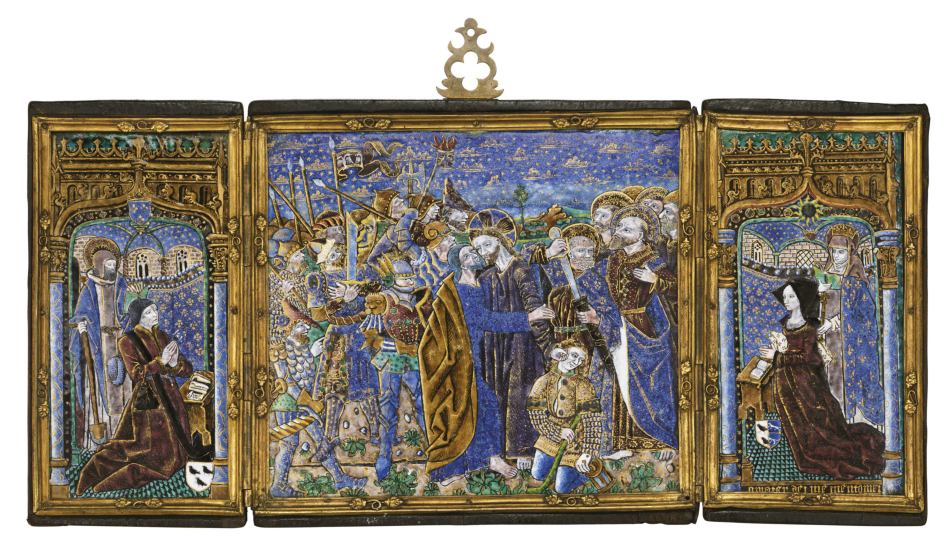

In [40]:
url_imagen = " https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0006_000(attributed_to_the_monvaerni_master_a_triptych_depicting_the_betrayal_o084008).jpg"
response = requests.get(url_imagen)
imagen = Image.open(io.BytesIO(response.content))
plt.figure(figsize=(12, 12))
plt.imshow(imagen)
plt.axis('off') 
plt.show()

Añadimos una columna para dar cuenta del número de piezas que componen cada lote.

In [41]:
df['Número de piezas']=None

In [42]:
dato='77⁄8 x 111⁄2 in. (39 , 7 x 29 cm); 73⁄4 x 111⁄4 in. (19 , 7 x 28 . 5 cm.); 73⁄4 x 111⁄4 in. (20 .5 x 30 ,4 cm.)'

bloques = dato.split(';')
alturas = []
anchuras = []

for bloque in bloques:
    medidas = bloque.replace(')', '').replace(',', '.').split('(')
    tamaño = None
    for medida in medidas:
        if {'cm.'} & set(medida.split()):
            tamaño = medida.replace('cm.', '').split('x')
            break

        if {'cm'} & set(medida.split()):
            tamaño = medida.replace('cm', '').split('x')
            break
    tamañocorr=[]
    for lado in tamaño:
        sep=lado.split('.')
        if len(sep)==2:
            lado=sep[0].strip() + '.' + sep[-1].strip()
        
        tamañocorr.append(float(lado))
        
    alturas.append(tamañocorr[0])
    anchuras.append(tamañocorr[1])
   


print(alturas, '\n',anchuras)


[39.7, 19.7, 20.5] 
 [29.0, 28.5, 30.4]


In [43]:
def procesar_tamaño(dato):
    if not isinstance(dato, str):
        return [None, None, 1]
    
    bloques = dato.split(';')
    alturas = []
    anchuras = []
    
    for bloque in bloques:
        medidas = bloque.replace(')', '').replace(',', '.').split('(')
        tamaño = None
        
        for medida in medidas:
            if {'cm.'} & set(medida.split()):
                tamaño = medida.replace('cm.', '').split('x')
                break
            if {'cm'} & set(medida.split()):
                tamaño = medida.replace('cm', '').split('x')
                break
        if tamaño is None:
            continue
            
        tamañocorr=[]
        for lado in tamaño:
            sep=lado.split('.')
            try:
                if len(sep)==2:
                    lado=sep[0].strip() + '.' + sep[-1].strip()
                tamañocorr.append(float(lado))
            except:
                continue
            
        if len(tamañocorr) != 2:
            continue    
            
        alturas.append(tamañocorr[0])
        anchuras.append(tamañocorr[1])    
    try:
        alturas = np.array(alturas)
        anchuras = np.array(anchuras)
    except:
        return[None, None]

    if alturas.mean() >= anchuras.mean():
        alto = alturas.mean()
        ancho = anchuras.sum()
    else:
        alto = alturas.sum()
        ancho = anchuras.mean()
        
    return [alto, ancho, len(bloques)]
    


print(procesar_tamaño('77⁄8 x 111⁄2 in. (39 , 7 x 29 cm); 73⁄4 x 111⁄4 in. (19 , 7 x 28 . 5 cm.); 73⁄4 x 111⁄4 in. (20 .5 x 30 ,4 cm.)'))

def extraer_alto(dato):
    return procesar_tamaño(dato)[0]

def extraer_ancho(dato):
    return procesar_tamaño(dato)[1]
    
def extraer_num(dato):
    return procesar_tamaño(dato)[2]

[np.float64(79.9), np.float64(29.3), 3]


In [44]:
df['Alto']=df['Tamaño'].apply(extraer_alto)
df['Ancho']=df['Tamaño'].apply(extraer_ancho)
df['Número de piezas']=df.apply(extraer_num)

C:\Users\34699\AppData\Local\Temp\ipykernel_21588\2512572336.py:44: RuntimeWarning: Mean of empty slice.
  if alturas.mean() >= anchuras.mean():
c:\Users\34699\OneDrive\Escritorio\ProyectoFinalSubastas\SubastasArteClasico\.venv\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\34699\AppData\Local\Temp\ipykernel_21588\2512572336.py:49: RuntimeWarning: Mean of empty slice.
  ancho = anchuras.mean()


Analicemos los fallos.

In [45]:
for i,row in df.iterrows():
    if row['Alto']==0:
        print(row['Tamaño'], '---------------------------------------', row['URL imagen'])

The central panel: 7 ½ x 8 ¼ in. (19 x 21 cm.) The side panels: 7 ½ x 3 5/8 in. (19 x 9.2 cm.), each --------------------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0006_000(attributed_to_the_monvaerni_master_a_triptych_depicting_the_betrayal_o084008).jpg
7 1/8 in. (18.1 cm.) diameter(2) --------------------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0016_000(jacob_grimmer_the_month_of_october_with_the_sign_of_scorpio_the_month114143).jpg
29 ¾ x 49 3/8 in. (73.7 x 125.5 cm.), each(2) --------------------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0024_000(antonio_joli_naples_a_view_of_the_riviera_di_chiaia_from_the_north-wes123246).jpg
one 54 ½ x 47 ¾ in. (138.4 x 121.3 cm.), one 54 ¾ x 33 ¼ in. (139.1 x 84.6 cm.) two slightly smaller(4) --------------------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0012_000(sir_edward_coley_bu

Por una parte observamos que la mayoría de errores cometidos proceden de las piezas que no son pinturas. Más aún, se obtiene un excelente criterio para identificarlas: o bien los bloques de medidas son de tres dimensiones 

                                18 3/4 x 9 x 4 in. (47.6 x 22.8 x 10.6 cm.)

o expresan cada medida individualmente especificando la dimensión a la que aplica; lo que se traduce en que el Tamaño de las esculturas contiene las palabras 'high', 'wide' o 'long' o en el caso francés, cuando la subasta es en Paris, suelen utilizar siempre el mismo formato: 
                
                                'H. 76 et 78,6 cm (30 et 31 in.) ; L. 28 cm (11 in.)'

 de $Hauteur$ y $Longueur$ (altura y longitud en francés); queda, pués, casi sin querer resuelto el problema de identificar los artículos que no son pinturas. Por otra parte, observamos la necesidad de replantear la manera en que rompemos el dato Tamaño en bloques y el modo en que los leemos para dar cabida a formatos más generales que contemplen casos como los siguientes:

                                
        1.    91 x 73 cm 35 3⁄4 x 28 1⁄2 in.   //   17 5/8 x 11 ¼ in. (44.7 X 28.6 cm.)  //  18 1/2 x 27 5/8 in. (47 x 60.2 cms)
              101⁄4x 51⁄2 in. (26 13.8 cm)    //    8 13/16 x 11 5/16 in. (22.4 cm. x 28.8 cm)       //     43 7/8 x 72 3/4 in. (111.5 x 184.5cm.)
              Image: 14 1/2 x 10 1/2 in. (368 x 268 mm.) Sheet: 17 x 11 7/8 in. (432 x 301 mm.)

        2.    29 ¾ x 49 3/8 in. (73.7 x 125.5 cm.), each       //       chaque : 71 x 88 cm (2715⁄16 x 345⁄8 in.)
              The central panel: 7 ½ x 8 ¼ in. (19 x 21 cm.) The side panels: 7 ½ x 3 5/8 in. (19 x 9.2 cm.), each
              one 54 ½ x 47 ¾ in. (138.4 x 121.3 cm.), one 54 ¾ x 33 ¼ in. (139.1 x 84.6 cm.) two slightly smaller(4) 

        3.    9 1/8 x 13 1/8 in. (23.2 x 33.3 cm.), with later additions of 3/8 x ¼ in. (1 x 0.8 cm) on each side

 1. Posibles desviaciones del formato típico del bloque: no separar la medición en cm. de aquella en in. mediante paréntesis; poner unidades de longitud 
      al lado de cada medicion (22.4 cm. x 28.8 cm) ---GRACIAS, es lo correcto --- y poner las unidades en mm.
      Errores humanos frecuentes que contemplar: poner cms en lugar de cm, no dejar espacios, poner la equis en mayúscula u olvidarsela.
 2. Los bloques no están necesariamente separados por  ' ; ' , a veces ni siquiera hay un separador explícito.
      Si un lote contiene dos piezas de la misma dimensión, se usa un sólo bloque de información para apuntar las medidas explicando que refiere a varias piezas.                       
 3. Estos casos son bastante frecuentes, debemos detectar que el segundo bloque de información refiere a medidas que deben sumarse al primero y no especificaciones de un nuevo bloque.



----------------------------------------------------------------------------------------------------------------------------------------------

Comencemos, ya que ha resultado tan sencillo identificarlas, deshaciendonos de las piezas infiltradas. Localizaremos en 'Tamaño' las citadas fórmulas y eliminaremos las filas donde las hayamos encontrado. Despídanse...

In [46]:
image_urls = [
    'https://www.christies.com/img/lotimages/2019/NYR/2019_NYR_17106_0029_000(a_batacchi_psyche062233).jpg',
    'https://www.christies.com/img/lotimages/2020/PAR/2020_PAR_18548_0099_000(buste_monumental_en_marbre_representant_jules_hardouin-mansart_dapres063419).jpg',
    'https://www.christies.com/img/lotimages/2019/NYR/2019_NYR_17106_0073_000(antonio_frilli_orientalist_beauty063453).jpg',
    'https://www.christies.com/img/lotimages/2023/PAR/2023_PAR_20692_0028_000(figure_representant_probablement_le_roi_charles_ii_despagne_sicile_ver122218).jpg',
    'https://www.christies.com/img/lotimages/2019/NYR/2019_NYR_17106_0074_000(charles-henri-joseph_cordier_torchere_femme_indienne_portant_un_vase_s063503).jpg',
    "https://www.christies.com/img/lotimages/2020/PAR/2020_PAR_18548_0099_000(buste_monumental_en_marbre_representant_jules_hardouin-mansart_dapres063419).jpg",
    'https://www.christies.com/img/lotimages/2019/NYR/2019_NYR_17106_0032_000(vittorio_caradossi_nypmhs062308).jpg'
]

images = []
for url in image_urls:
    response = requests.get(url)
    image_data = io.BytesIO(response.content)
    image = Image.open(image_data)
    images.append(image)

num_images = len(images)
columns = 7
rows = 1

fig, axes = plt.subplots(rows, columns, figsize=(14, 6*rows))

for i, (ax, image) in enumerate(zip(axes.flatten(), images)):
    ax.imshow(image)
    ax.axis('off')

for j in range(i+1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()
plt.show()

In [47]:
def normalizartamaño(tamaño):
    try:
        return tamaño.upper().replace(',',' ').replace(':',' ')  
    except:
        return None

df['auxiliar'] = df['Tamaño'].apply(normalizartamaño)

condición = (
    df['auxiliar'].str.contains('HIGH') | 
    df['auxiliar'].str.contains('WIDE') | 
    df['auxiliar'].str.contains('LONG') |
    df['auxiliar'].str.contains('HEIGHT') | 
    df['auxiliar'].str.contains('WIDTH') | 
    df['auxiliar'].str.contains('LENGTH') |
    df['auxiliar'].str.contains('BRONZE') |  
    df['Tamaño'].str.contains('H.:') | 
    df['Tamaño'].str.contains('HT.:') |
    df['Tamaño'].str.contains('D.:') |
    df['Tamaño'].str.contains('P.:') |
    df['Tamaño'].str.contains('L.:') |
    df['Tamaño'].str.contains('H.:') |
    df['Tamaño'].str.startswith(('L.', 'H.', 'D.', 'P.'))
)

df = df[~condición]
df = df.drop(columns=['auxiliar'])


------------------------------------------------------------------------------------------------------------------------------------------------

$\underline{\textbf{ Nuevo enfoque}}$ : 

Puesto que todos los bloques son variantes de $44.7 \times 28.6 \ cm$, en particular terminan en $m$. De esta forma, para localizarlos, lo que haremos será recorrer el texto hacia delante deteniéndonos en cada letra $m$ para comprobar si se trata de la $m$ final de un bloque. Entonces empezaremos a recorrer el texto hacia detrás verificando que cada caracter encontrado es admisible en un bloque, esto es, es un número, una coma, un punto, un espacio, o alguna de las letras c, m, s, x o X, que son las que hacen falta para escribir las unidades y expresar el producto de la longitud por la anchura. Un bloque con información de medidas contendrá una $equis$, mayúscula o minúscula, multiplicando los lados y números con las medida de cada uno. Así pués, una $m$ será la $m$ final de un bloque si al recorrer el texto hacia atrás encontramos por este orden: números, una $\times$ y más números. Si después encontrasemos otra $\times$ entonces nos detendríamos y abandonaríamos la busqueda, pués habríamos encontrado un bloque con un producto de tres lados, que no corresponden a cuadros.


In [48]:
dato = 'The central panel: 7 ½ x 8 ¼ in. ( 19cms X 2,1 cm.) The side panels: 7 ½ x 3 5/8 in. (19 x 9.2 cm.), each'
#dato= '77⁄8 x 111⁄2 in. (39 , 7 x 29 cm); 73⁄4 x 111⁄4 in. (19 , 7 x 28 . 5 cm.); 73⁄4 x 111⁄4 in. (20 .5 x 30 ,4 cm.)'


dato=quitar_tildes(dato).upper()

admisible={'C', 'M', 'S', 'X', ',' , '.', ' ' }

bloques=[]

for i in range(len(dato)-1):
    
    if dato[i]=='M':   
        
        equis=False    
        numeros_antes_de_equis=False
        numeros_despues_de_equis=False
        
        j=1
        
        while True:
            
            if dato[i-j].isdigit(): 
                if not equis:
                    numeros_antes_de_equis=True 
                if equis:
                    numeros_despues_de_equis=True
                
            if dato[i-j] == 'X':
                if equis:
                    break
                if not equis:
                    equis = True    
                    
            if (not dato[i-j].isdigit()) and (dato[i-j] not in admisible):
                if numeros_antes_de_equis and numeros_despues_de_equis and equis:
                    
                    bloque = dato[i-j+1:i+1] 
                    
                    bloques.append(bloque)
                break
            
            j = j + 1
            
alturas = []
anchuras = []

for bloque in bloques:
    medidas=bloque.replace('C','').replace('M','').replace('S','').replace(',','.').split('X')
    tamaño=[]
    for x in medidas:
        sep=x.split('.')
        if len(sep)==1:
            x=x + '.0'
        sep=x.split('.')
        lado = sep[0].strip() + '.' + sep[1].strip()
        tamaño.append(float(lado))
        
    alturas.append(tamaño[0])
    anchuras.append(tamaño[1])  

alturas = np.array(alturas)
anchuras = np.array(anchuras)

if alturas.mean() >= anchuras.mean():
    alto = alturas.mean()
    ancho = anchuras.sum()
else:
    alto = alturas.sum()
    ancho = anchuras.mean()

print(bloques)
print(alto)
print(ancho)



[' 19CMS X 2,1 CM', '19 X 9.2 CM']
19.0
11.299999999999999


In [49]:
for i,row in df.iterrows():
    if row['Alto']==0:
        print(row['Tamaño'], '---------------------------------------', row['URL imagen'])

The central panel: 7 ½ x 8 ¼ in. (19 x 21 cm.) The side panels: 7 ½ x 3 5/8 in. (19 x 9.2 cm.), each --------------------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0006_000(attributed_to_the_monvaerni_master_a_triptych_depicting_the_betrayal_o084008).jpg
7 1/8 in. (18.1 cm.) diameter(2) --------------------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0016_000(jacob_grimmer_the_month_of_october_with_the_sign_of_scorpio_the_month114143).jpg
29 ¾ x 49 3/8 in. (73.7 x 125.5 cm.), each(2) --------------------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0024_000(antonio_joli_naples_a_view_of_the_riviera_di_chiaia_from_the_north-wes123246).jpg
one 54 ½ x 47 ¾ in. (138.4 x 121.3 cm.), one 54 ¾ x 33 ¼ in. (139.1 x 84.6 cm.) two slightly smaller(4) --------------------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0012_000(sir_edward_coley_bu

Algunas mejoras: 
1. Para lograr identificar como bloque de medidas esta clase de información cuando no utilizan la x para el producto añadimos una condición más al bucle $while$ antes de cerrar al encontrar un caracter no admisible. Comprobaremos que $j \geqslant 8$,  que es lo que hace falta para escribir   $\quad 12 \quad 34 \quad cm \ $. En tal caso, si haciendo split() obtenemos una lista con al menos 3 elementos siendo el último cm y números el primero un número, nos detendremos a comprobar si el bloque puede contener información de medidas.
2. Tomar en consideración la posibilidad de que las unidades estén en mm. Esta es fácil.
3. Las piezas circulares, basta comprobar si contienen la palabra diameter (o diam.) en sus medidas. En tal caso, se busca un bloque de medidas con una única dimensión que corresponderá al diametro. La cuadratura del círculo, que en python es posible, el el valor que asignaremos como altura y anchura de la pieza.
4. Para resolver el problema de los cuantificadores en el tamaño realmente no necesitamos conocer a cual de las medidas exactamente hace referencia, pués finalmente todas ellas se transforman en un único conjunto de datos: la altura y anchura del lote conjunto. Nos bastará pués con definir una manera de repercutir la presencia de un cuantificador sobre las medidas totales de tal forma que su efecto en el área total sea  equivalente a añadirle una pieza (o varias, según) al lote.

In [50]:
#La siguiente función busca cuantas veces aparece una str repetida dentro de otra y devuelve la lista de indices correspondientes al inicio de cada aparición
#Su propósito es asignar a cada cuantificador presente en una frase especificamente el artículo al que refiere. ej: Lote de dos cuadros '(100x70 cm) each(2)'

def encontrar_indices_palabra(palabra, frase):
    indices = []
    palabra_len = len(palabra)
    frase_len = len(frase)
    
    # Recorrer la frase para buscar la palabra
    for i in range(frase_len - palabra_len + 1):
        if frase[i:i + palabra_len] == palabra:
            indices.append(i)
    
    return indices


In [51]:
ejemplos=['8 ¼ in. (20.8 cm) (diam.)','9 3/8 in. (23.8 cm) (diam.)','34 3/8 in. (87.3 cm.) diameter', '24 ½ in. (62.3 cm.) diameter' ,
          '35 in. (88.9 cm.) diameter']     

dato='17 ¾ x 55 ¼ in. (45, 7   140.2 mm.)'

admisible={'C', 'M', 'S', 'X', ',' , '.', ' ' }

alturas = []
anchuras = []
dato='| ' +  quitar_tildes(dato).upper().replace(',', '.').replace('.', ' . ').replace(':', '  ').replace(')', ' ').replace('(', '(  ') + '  |' #Con la barra al inicio nos aseguramos de que al recorrer el texto hacia atrás se termine encontrando un caracter no admisible aún cuando el texto empiece por un bloque de medidas.
print(dato)

pieza_circular = False
if {'DIAM','DIAMETER','DIAMETRE'} & set(dato.split()):
    pieza_circular=True
    print('circulo')


for i in range(len(dato)-1):
    equis=False    
    numeros_antes_de_equis=False
    numeros_despues_de_equis=False
    bloque_en_mm=False  #Variable para determinar las ud. en que está expresado el bloque.
    
    if pieza_circular: #Si la pieza es circular solo buscamos un dato nunmérico, que es lo mismo que buscar dos suponiendo que ya se ha encontrado uno
        equis=True   
        numeros_antes_de_equis=True       

    if dato[i]=='M' and dato[i+1] != 'M': #Si las ud. son en MM la condicion se verifica para dos indices consecutivos, lo que hace que el bloque correspondiente se repita    
        
        if dato[i-1]=='M':
            bloque_en_mm = True
            
        j=1
        lados=[]
        
        while True:
            
            if dato[i-j].isdigit(): 
                if not equis:
                    numeros_antes_de_equis=True 
                if equis:
                    numeros_despues_de_equis=True
                
            if dato[i-j] == 'X':
                if equis:
                    print('he llegao')
                    
                    if (dato[i-j-1] in admisible) or dato[i-j-1].isdigit():
                        break
                    
                    print('sustin')
                    
                    
                if not equis:
                    equis = True    
                    
            if (not dato[i-j].isdigit()) and (dato[i-j] not in admisible):
                
                bloque = dato[i-j+1:i+1] 
                
                print(bloque)
                
                if numeros_antes_de_equis and numeros_despues_de_equis and equis:
                    
                    medidas=bloque.replace('C','').replace('M','').replace('S','').replace(',','.').split('X')
                    
                    if not pieza_circular:
                        for x in medidas:
                            sep=x.split('.')
                            if len(sep)==1:
                                x=x + '.0'
                            sep=x.split('.')
                            lado = sep[0].strip() + '.' + sep[1].strip()
                            if not bloque_en_mm:
                                lados.append(float(lado))
                            else:
                                lados.append(float(lado)/10)
                                
                        alturas.append(lados[0])
                        anchuras.append(lados[1])
                        
                        break
                        
                    if pieza_circular:
                        print('¿estamos aqui no?')
                        print(medidas)
                        if medidas[0].strip()[0] == '.':
                            medidas[0]=medidas[0].strip()[1:]
                            print(medidas[0])
                        
                        sep=medidas[0].split('.')
                        if len(sep)==1:
                            sep=sep[0] + '.0'
                        medidas = sep[0].strip() + '.' + sep[1].strip()
                        
                        print(medidas)    
                        radio=float(medidas.strip())/2
                        cuadratura = radio * math.sqrt(math.pi)
                        if bloque_en_mm:
                            cuadratura=cuadratura/10  
                            
                        alturas.append(cuadratura)
                        anchuras.append(cuadratura)
                        
                    break
                    
                if (not pieza_circular) and j > 7 and len(bloque.split()) >= 3 and bloque.split()[0][0].isdigit() and bloque.split()[-1] in {'MM', 'CM'}: 
                    bloc=(bloque.split()) 
                    print(bloc)
                    lados=[]
                    cuenta=0
                    for idx in range(len(bloc)):
                        
                        if bloc[idx][0].isdigit() and bloc[idx][-1].isdigit(): 
                            
                            if idx > 1 and bloc[idx-1]=='.' and bloc[idx-2][0].isdigit() and bloc[idx-2][-1].isdigit():
                                continue
                            
                            if bloc[idx + 1] == '.':
                                if bloc[idx + 2][0].isdigit() and bloc[idx + 2][-1].isdigit():
                                    lado = bloc[idx].strip() + '.' + bloc[idx + 2].strip()
                                    ladoN=float(lado)
                                    if bloque_en_mm:
                                        lados.append(ladoN/10)
                                    else:
                                        lados.append(ladoN)
                                    
                                    cuenta = cuenta + 1
                                else:
                                    continue
                            else:
                                lado = bloc[idx].strip()
                                ladoN = float(lado)
                                
                                if bloque_en_mm:
                                    lados.append(ladoN/10)
                                else:   
                                    lados.append(ladoN)
                                
                                cuenta = cuenta + 1         
                    
                    if cuenta != 2: 
                        break

                    alturas.append(lados[0])
                    anchuras.append(lados[-1])

                            
                    
                

                
                break
            
            j = j + 1
            
cuantificadores=['EACH', 'CHAQUE', 'UNE PAIRE']

num_piezas=len(alturas)

alturas = np.array(alturas)
anchuras = np.array(anchuras)

for cuantificador in cuantificadores:
    multiplicador = 1
    factor=1
    if cuantificador in dato.upper():
        end=encontrar_indices_palabra(cuantificador, dato.upper())[0] + len(cuantificador)
        dato=dato + '      ' #evita que se escapen los índices en lo siguiente
        if dato[end]=='(' and dato[end + 1].isdigit() and dato[end + 2]==')':
            multiplicador=int(dato[end + 1])
        else:
            multiplicador=2
        num_piezas = num_piezas + multiplicador - 1
        factor=math.sqrt(multiplicador)
    
    alturas= factor*alturas
    anchuras=factor*anchuras


if alturas.mean() >= anchuras.mean():
    alto = alturas.mean()
    ancho = anchuras.sum()
else:
    alto = alturas.sum()
    ancho = anchuras.mean()


print(num_piezas)
print(alturas)
print(anchuras)
print(alto)
print(ancho)

| 17  3/4 X 55  1/4 IN .  (  45 .  7   140 . 2 MM .    |
  45 .  7   140 . 2 MM
['45', '.', '7', '140', '.', '2', 'MM']
1
[4.57]
[14.02]
4.57
14.02


In [52]:
###############################################################################################################################################################################
###############################################################################################################################################################################
def extraer_tamaño_mejorada(dato):        
    
    if not isinstance(dato, str):
        return [None, None, None, False]

    admisible={'C', 'M', 'S', 'X', ',' , '.', ' ' }

    alturas = []
    anchuras = []
    datoTr='| ' +  quitar_tildes(dato).upper().replace(',', '.').replace('.', ' . ').replace(':', '  ').replace(')', ' ').replace('(', '  (  ') + '  |' #Añadimos caracteres inutiles al inicio y al final para evitar problemas de índices y asegurar la existencia de un carateres inadmisible al inicio que fuerce la salida del bucle
    pieza_circular = False
    if {'DIAM','DIAMETER','DIAMETRE'} & set(datoTr.split()):
        pieza_circular=True


    for i in range(len(datoTr)-1):
        
        equis=False    
        numeros_antes_de_equis=False
        numeros_despues_de_equis=False
        bloque_en_mm=False  #Variable para determinar las ud. en que está expresado el bloque.
        
        if pieza_circular: #Si la pieza es circular solo buscamos un dato nunmérico, que es lo mismo que buscar dos suponiendo que ya se ha encontrado uno
            equis=True   
            numeros_antes_de_equis=True       

        if datoTr[i]=='M' and datoTr[i+1] != 'M': #Si las ud. son en MM la condicion se verifica para dos indices consecutivos, lo que hace que el bloque correspondiente se repita    
            
            if datoTr[i-1]=='M':
                bloque_en_mm = True
                
            j=1
            lados=[]
            
            while True:
                
                if datoTr[i-j].isdigit(): 
                    if not equis:
                        numeros_antes_de_equis=True 
                    if equis:
                        numeros_despues_de_equis=True
                    
                if datoTr[i-j] == 'X':
                    if equis:
                        if (datoTr[i-j-1] in admisible) or datoTr[i-j-1].isdigit():
                            return [0 , 0 , 0 , True ]
                        
                    if not equis:
                        equis = True    
                        
                if (not datoTr[i-j].isdigit()) and (datoTr[i-j] not in admisible):
                    
                    bloque = datoTr[i-j+1:i+1] #al encontrar un caracter inadmisible componemos los aceptables para analizarlos.
                    
                    if numeros_antes_de_equis and numeros_despues_de_equis and equis: #Si tien char. de bloq de medida lo limpiamos 
                        
                        bloqueL=bloque.replace('C','').replace('M','').replace('S','').replace(',','.') 
                        
                        if not pieza_circular:
                            Lados=bloqueL.split('X') #creamos una lista con los factores 
                            for ld in Lados:
                                pts=ld.split('.') #rompemos por el separador decimal para formatear
                                if len(pts)==1: #si no tiene parte decimal metemos .0 a la lista para crearla
                                    pts = [pts[0] , '0']
                                lado = pts[0].strip() + '.' + pts[1].strip()  #quitamos de las partes los espacios sobrantes y las juntamos
                                ladoNum=float(lado) #convertimos el dato a decimal
                                
                                if not bloque_en_mm:
                                    lados.append(ladoNum)  #lo añadimos a la lista de lados
                                else:
                                    lados.append(ladoNum/10)  #si las unidades están en mm previamente las pasamos a cm
                                    
                            alturas.append(lados[0])   #Terminado el proceso agregamos los lados al listado correspondiente...
                            anchuras.append(lados[-1])  
                            
                            break                   #  ... y seguimos iterando
                            
                        if pieza_circular: #Si buscamos el diámetro de un círculo, bloqueL contendrá información de un único dato
                            diamSucio=bloqueL
                            if bloqueL.strip()[0] == '.':
                                diamSucio = bloqueL.strip()[1:] #empezamos limpiando por el  primer caracter si se trata de un punto para evitar sorpresas al separar
                            
                            pts=diamSucio.split('.')  #Separamos las partes por el punto decimal en una lista
                            if len(pts)==1:
                                pts = [pts[0] , '0']  #si no tiene parte decimal metemos .0 a la lista para crearla     
                            diamL = pts[0].strip() + '.' + pts[1].strip()  #juntando las partes tenemos formateado el diámetro. aún como texto.
                            diam=float(diamL)                           #pasamos a número
                            radio=diam/2                               # y obtenemos el radio
                            cuadratura = radio * math.sqrt(math.pi)      #sacamos la cuadratura
                            if bloque_en_mm:
                                cuadratura=cuadratura/10     #si estamos en mm la pasamos a cm 
                                
                            alturas.append(cuadratura)  #la añadimos a ambas listas
                            anchuras.append(cuadratura)
                            
                        break
                    
                        
                    if (not pieza_circular) and j > 7 and len(bloque.split()) >= 3 and bloque.split()[0][0].isdigit() and bloque.split()[-1] in {'MM', 'CM'}: 
                        # Si el bloque es suficientemente largo, al hacer split rompe en al menos 3 partes, siendo la 1a un Nº y la última ud. de longitud podría contener información de dimensiones
                        bloc=(bloque.split()) #Lista de trozos
                        
                        lados=[] #inicializamos lista de lados
                        cuenta=0
                        for idx in range(len(bloc)): #recorremos la lista hacia adelante
                            
                            if bloc[idx][0].isdigit() and bloc[idx][-1].isdigit(): #Al encontrar una entrada compuesta por números
                                
                                if idx > 1 and bloc[idx-1]=='.' and bloc[idx-2][0].isdigit() and bloc[idx-2][-1].isdigit(): #Nos aseguramos de que no sean los decimales del pedazo anterior
                                    continue
                                
                                if bloc[idx + 1] == '.': #Si le sucede un punto decimal
                                    if bloc[idx + 2][0].isdigit() and bloc[idx + 2][-1].isdigit(): #comprobamos que después haya un número
                                        lado = bloc[idx].strip() + '.' + bloc[idx + 2].strip() #en caso afirmativo componemos el dato numerico uniendo parte entera y parte decimal
                                        ladoN=float(lado) #pasamos el dato a float 
                                        if bloque_en_mm:
                                            lados.append(ladoN/10)  #lo agregamos a la lista de lados tomando en consideración las medidas.
                                        else:
                                            lados.append(ladoN)
                                        
                                        cuenta = cuenta + 1 #sumamos 1 a la cuenta de lados
                                    else:
                                        continue
                                else:
                                    lado = bloc[idx].strip() #Si lo que sucede al numero no es el punto decimal, entonces es entero y hacemos lo mismo que antes pero sin parte decimal
                                    ladoN = float(lado)
                                    
                                    if bloque_en_mm:
                                        lados.append(ladoN/10)
                                    else:   
                                        lados.append(ladoN)
                                    
                                    cuenta = cuenta + 1         
                        
                        if cuenta != 2: 
                            if cuenta == 1:
                                break
                            if cuenta == 3:
                                return [0 , 0 , 0 , True ] #Si el bloque tiene 3 lados se trata de una escultura
                            

                        alturas.append(lados[0])
                        anchuras.append(lados[-1])
                    
                    break
                
                j = j + 1
                
    cuantificadores=['EACH', 'CHAQUE','UNE PAIRE']

    num_piezas=len(alturas)

    alturas = np.array(alturas)
    anchuras = np.array(anchuras)

    for cuantificador in cuantificadores:
        multiplicador = 1
        factor=1
        if cuantificador in dato.upper():
            end=encontrar_indices_palabra(cuantificador, dato.upper())[0] + len(cuantificador)
            dato=dato + '     ' #evita que se escapen los índices en lo siguiente
            if dato[end]=='(' and dato[end + 1].isdigit() and dato[end + 2]==')':
                multiplicador=int(dato[end + 1])
            else:
                multiplicador=2
            num_piezas = num_piezas + multiplicador - 1
            factor=math.sqrt(multiplicador)
        
        alturas= factor*alturas
        anchuras=factor*anchuras


    if alturas.mean() >= anchuras.mean():
        alto = alturas.mean()
        ancho = anchuras.sum()
    else:
        alto = alturas.sum()
        ancho = anchuras.mean()

    return [alto, ancho, num_piezas, False]


def extraer_alto_mejor(dato):
    return extraer_tamaño_mejorada(dato)[0]

def extraer_ancho_mejor(dato):
    return extraer_tamaño_mejorada(dato)[1]
    
def extraer_num_mejor(dato):
    return extraer_tamaño_mejorada(dato)[2]

def es_estatua(dato):
    return  extraer_tamaño_mejorada(dato)[3]

In [53]:
extraer_tamaño_mejorada('1/8 in. (18.1 cm.) diameter  each(4)')

[np.float64(32.08141470138984), np.float64(32.08141470138984), 4, False]

In [54]:
df['Alto']=None
df['Ancho']=None
df['Número de piezas']=None
df['es_estatua'] = None

In [55]:
df['Alto']=df['Tamaño'].apply(extraer_alto_mejor)
df['Ancho']=df['Tamaño'].apply(extraer_ancho_mejor)
df['Número de piezas']=df['Tamaño'].apply(extraer_num_mejor)
df['es_estatua'] = df['Tamaño'].apply(es_estatua)

C:\Users\34699\AppData\Local\Temp\ipykernel_21588\494597453.py:175: RuntimeWarning: Mean of empty slice.
  if alturas.mean() >= anchuras.mean():
c:\Users\34699\OneDrive\Escritorio\ProyectoFinalSubastas\SubastasArteClasico\.venv\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\34699\AppData\Local\Temp\ipykernel_21588\494597453.py:180: RuntimeWarning: Mean of empty slice.
  ancho = anchuras.mean()


In [56]:
df.reset_index(drop=True, inplace=True)

for i in range(df.shape[0]-1):
    try:
        valores=extraer_tamaño_mejorada(df.loc[i,'Tamaño'])
        df.loc[i,'Alto'] = valores[0]
        df.loc[i,'Ancho'] = valores[1]
        df.loc[i,'Número de piezas'] = valores[2] 
        df.loc[i, 'es_estatua']=valores[3]
    except:
        print(df.loc[i,'Tamaño'])

C:\Users\34699\AppData\Local\Temp\ipykernel_21588\494597453.py:175: RuntimeWarning: Mean of empty slice.
  if alturas.mean() >= anchuras.mean():
c:\Users\34699\OneDrive\Escritorio\ProyectoFinalSubastas\SubastasArteClasico\.venv\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\34699\AppData\Local\Temp\ipykernel_21588\494597453.py:180: RuntimeWarning: Mean of empty slice.
  ancho = anchuras.mean()
C:\Users\34699\AppData\Local\Temp\ipykernel_21588\494597453.py:175: RuntimeWarning: Mean of empty slice.
  if alturas.mean() >= anchuras.mean():
c:\Users\34699\OneDrive\Escritorio\ProyectoFinalSubastas\SubastasArteClasico\.venv\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\34699\AppData\Local\Temp\ipykernel_21588\494597453.py:180: RuntimeWarning: Mean of empty slice.
  ancho = anchuras.mea

In [57]:
for i,row in df.iterrows():
    if row['Alto']==0:
        print(i, row['Tamaño'] ,'----->' ,extraer_tamaño_mejorada(row['Tamaño']))

392 6 7⁄8 x 2 3⁄8 in. -----> [np.float64(0.0), np.float64(nan), 0, False]
393 14 in. (35.5 cm) -----> [np.float64(0.0), np.float64(nan), 0, False]
493 68 x 41 x 17 ½ in. (173 x 104.5 x 45 cm.) -----> [0, 0, 0, True]
1019 31 1/4 x 38 1/4 in. -----> [np.float64(0.0), np.float64(nan), 0, False]
1208 39 3/4 x 53 in. (100.9 x 134.7). -----> [np.float64(0.0), np.float64(nan), 0, False]
1602 Fontaine avec sa vasque en marbre : H. 40 cm. (15. 3/4 in.) ; L. 56,5 cm. (221⁄4 in.) ; P. 38 cm. (15 in.) H. totale 140 cm. (55 in.) ; L. 75 cm. (291⁄2 in.) ; P. 75 cm. (291⁄2 in.) -----> [np.float64(0.0), np.float64(nan), 0, False]
1731 13 x 37 3/4 x 2 1/4 in. (33 x 98.4 x 5.7 cm.) Leda and the Swan 13 1/4 x 38 3/4 x 2 1/2 in. (33.7 x 97.1 x 6.4 cm.) Bath of Venus -----> [0, 0, 0, True]
1748 22 3/4 x 13 3/4 x 5 3/4 in. (57.8 x 34.9 x 14.6 cm) -----> [0, 0, 0, True]
1749 22 3/4 x 13 3/4 x 5 3/4 in. (57.8 x 34.9 x 14.6 cm) -----> [0, 0, 0, True]
1750 22 3/4 x 13 3/4 x 5 3/4 in. (57.8 x 34.9 x 14.6 cm) ---

C:\Users\34699\AppData\Local\Temp\ipykernel_21588\494597453.py:175: RuntimeWarning: Mean of empty slice.
  if alturas.mean() >= anchuras.mean():
c:\Users\34699\OneDrive\Escritorio\ProyectoFinalSubastas\SubastasArteClasico\.venv\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\34699\AppData\Local\Temp\ipykernel_21588\494597453.py:180: RuntimeWarning: Mean of empty slice.
  ancho = anchuras.mean()


A excepción de las esculturas y de errores humanos en la anotación de las medidas, que escapan a nuestro alcance, (falta de unidades o de especificaciones), las dimensiones de todas las Obras extraídas están perfectamente determinadas. Procedemos a eliminar las esculturas que faltaban.

In [58]:
df = df[df['es_estatua']==False]
df = df.drop(columns=['es_estatua'])
          

In [59]:
df.columns

Index(['Tema', 'Ciudad', 'Fecha', 'Número de lote', 'URL', 'Descripción',
       'Nombre del artista', 'Precio estimado', 'Precio de venta',
       'URL imagen', 'Técnica', 'Tamaño', 'AP0', 'AP1', 'AP2', 'AP3', 'AP4',
       'AP5', 'AP6', 'AP7', 'AP8', 'AP9', 'Mínimo estimado', 'Máximo estimado',
       'Precio_num', 'Moneda', 'preNombre', 'Año de nacimiento', 'País',
       'Nombre', 'Alto', 'Ancho', 'Medio', 'Soporte', 'Número de piezas'],
      dtype='object')

AHora que conocemos la altura y la anchura de (prácticamente) todos los cuadros, podemos definir otras dos variables numéricas directamente derivadas de ellas de relevancia:

1. La relación de tamaño entre ambos lados. 
2. La superficie del cuadro. 

Estas dos lecturas de las dimensiones, por cómo se calculan, son independientes. Además, es posible recuperar las longitudes de los lados a partir de ellas (dos ecuciones, dos incognitas). Por otra parte, ambas son decisiones estéticas relevantes; las proporciones del cuadro son la primera decisión importante que el artista debe tomar en terminpos de composición al planificar una obra. Por su parte, el tamaño del cuadro, aunque a diferencia de las proporciones tiene también una componente económica, es también una importante decisión estética, está relacionado con aquellos aspectos de la imagen en los que el artista quiere profundizar: el minucioso detalle, en una pieza más pequeña, o la forma la luz y el color, en una pieza mayor. Sólo los maestros son capaces de lograr ambas. Además, repito, ¡SON NUMÉRICAS!Será interesante ver como se relacionan con la restanteinformación disponble.

Sin demasiada elaboración:

In [60]:
df['Área total']=df['Alto']*df['Ancho']
df['Proporción']=np.where(df['Ancho'].isnull(), np.nan, df['Alto'] / df['Ancho'])


In [61]:
for i,fila in df.iterrows():
    print(fila['Área total'], '...............', fila['Proporción'])

2527.98 ............... 0.8479853479853479
6150.599999999999 ............... 1.3701492537313433
1640.04 ............... 1.3699421965317917
4736.37 ............... 1.1971383147853736
3929.45 ............... 1.3229357798165136
1147.6000000000001 ............... 0.6291390728476821
814.5799999999999 ............... 1.4024896265560165
2905.98 ............... 0.7344992050874405
9358.5 ............... 0.2779291553133515
1071.0 ............... 1.6470588235294117
6308.999999999999 ............... 0.3209700427960057
3438.05 ............... 1.2862669245647969
5522.0 ............... 0.547808764940239
1737.4 ............... 0.6653620352250489
2428.02 ............... 0.7369337979094076
257.304292310638 ............... 1.0
7117.080000000001 ............... 1.2257217847769029
25652.879999999997 ............... 1.268635724331927
50553.0 ............... 0.6733576642335767
7612.799999999999 ............... 0.7991803278688525
1595.56 ............... 0.7809734513274336
18498.700000000004 ............... 0.

Aún debemos procesar el dato de la técnica aplicada en el cuadro. El objetivo es clasificar todas las obras según el tipo de pintura empleado y la superficie de aplicación, debemos lograr el menor (todavía significativo) conjunto posible de características con las que etiquetar todas las obras de la muestra.

In [62]:
for i,row in df.iterrows():
    if row['Precio_num'] > 100000:
        print(row['Nombre'],'----------------', row['URL imagen'])

GABRIEL ZEHENDER ---------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0001_000(gabriel_zehender_double_portrait_of_a_married_couple_half-length083200).jpg
PIETER COECKE VAN AELST I ---------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0002_000(pieter_coecke_van_aelst_i_saint_jerome_in_his_study083219).jpg
GEORGE GOWER ---------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0003_000(attributed_to_george_gower_portrait_of_queen_elizabeth_i_bust-length_i083756).jpg
QUENTIN METSYS ---------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0004_000(quentin_metsys_the_madonna_of_the_cherries083827).jpg
MASTER OF THE LEGEND OF SAINT LUCY ---------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22668_0005_000(master_of_the_legend_of_saint_lucy_saint_anthony_of_padua_with_the_inf083947).jpg
THE MONVAERNI MASTER ---------------- https://www.christies.com/img/lotimages/2024/CKS/

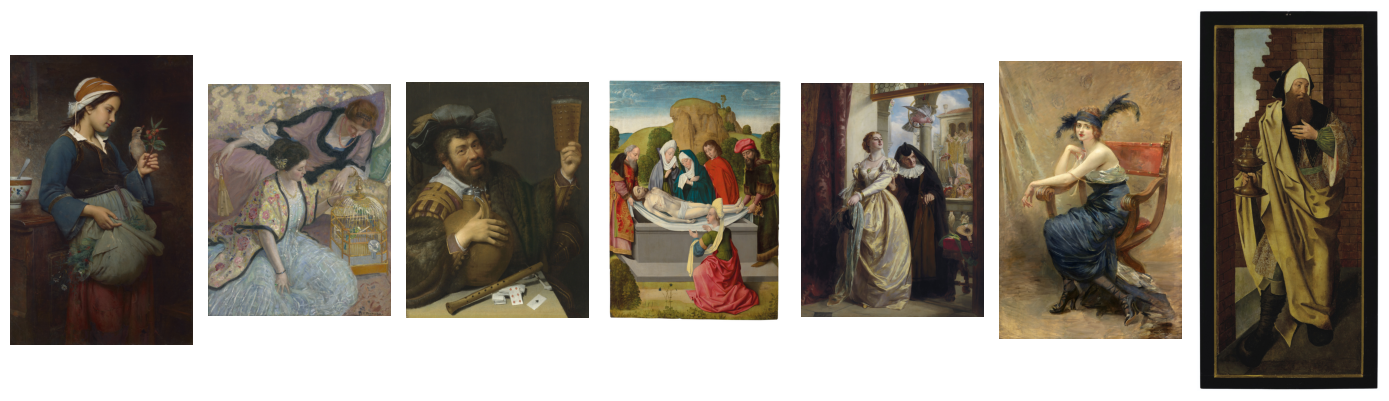

In [63]:
image_urls = [
    'https://www.christies.com/img/LotImages/2022/NYR/2022_NYR_20675_0022_000(emile-auguste_hublin_fillette_a_loiseau_d6365692055150).jpg',
    'https://www.christies.com/img/lotimages/2021/NYR/2021_NYR_20376_0019C_000(frederick_carl_frieseke_the_parrots044538).jpg',
    'https://www.christies.com/img/lotimages/2019/CKS/2019_CKS_17195_0032_000(willem_van_der_vliet_merry_drinker_with_a_large_jug_and_a_glass_of_bee101458).jpg',
    'https://www.christies.com/img/lotimages/2020/CKS/2020_CKS_18874_0007_000(netherlandish_school_circa_1470_the_entombment_of_christ083534).jpg',
    'https://www.christies.com/img/lotimages/2019/CKS/2019_CKS_17199_0033_000(john_callcott_horsley_ra_juliet_and_her_nurse110201).jpg',
    'https://www.christies.com/img/lotimages/2021/NYR/2021_NYR_19724_0035_000(madeleine_jeanne_lemaire_femme_assise_dans_un_fauteuil_dagobert060650).jpg',
    'https://www.christies.com/img/lotimages/2019/NYR/2019_NYR_17655_0804_000(follower_of_hieronymus_bosch_the_wing_of_a_polyptych_the_flagellation083442).jpg'
]

images = []
for url in image_urls:
    response = requests.get(url)
    image_data = io.BytesIO(response.content)
    image = Image.open(image_data)
    images.append(image)

num_images = len(images)
columns = 7
rows = 1

fig, axes = plt.subplots(rows, columns, figsize=(14, 6*rows))

for i, (ax, image) in enumerate(zip(axes.flatten(), images)):
    ax.imshow(image)
    ax.axis('off')

for j in range(i+1, len(axes.flatten())):
    axes.flatten()[j].axis('off')

plt.tight_layout()

plt.show()




El procedimiento para determinar el medio y el soporte empleados en cada na  de las obras partiendo del breve texto contenido en Técnica es esencialmente el mismo que el que empleamos para hallar el país de origen partiendo del nombre del artista. Generaremos un diccionario con jerga del mundo de la pintura relacionada con cada tipo de pintura y cada superficie y simplemente trataremos de encontrar las palabras de nuestro dicccionario en el texto de cada obra para asignarle, en caso de éxito, los valores de la clave correspondiete a la entrada coincidente. 

In [64]:
for i,row in df.iterrows():
    print(row['Técnica'])

oil on panel
oil on panel
oil on panel
oil on panel
oil on panel
parcel-gilt polychrome enamel; the ﬂanking wings each with a kneeling donor ﬁgure and attendant saint, possibly associated, inscribed 'O mater dei memento mei' beneath both donors, in a gilt-copper frame and cuir-ciselé backing inscribed to the reverse 'No 44 / D.P.' and with a paper label inscribed '90'
tempera on gold ground panel, with its original painted faux porphyry reverse, in its original engaged frame
oil on canvas, laid on panel
tempera on gold ground panel, in an engaged frame
black chalk on paper
tempera and gold on panel
oil on panel
oil on panel
oil on panel
oil on panel
oil on panel, roundel
oil on canvas
oil on canvas
oil on canvas
oil on canvas
oil on millboard
oil on canvas
oil on canvas
oil on canvas
pencil and watercolour, heightened with touches of white on paper
pencil and watercolour, heightened with touches of bodycolour on paper
pencil on paper
pencil and coloured chalk on brown paper
pencil and 

In [65]:

Medios = {
    'Óleo y témperas': {"OIL", "HUILE", 'GRISSAILLE', 'TEMPERA', 'GOLD', 'CERUSE', 'ESSENCE', 'DETREMPE', 'DISTEMPER'},
    
    'Técnicas de dibujo húmedas': {"WATERCOLOR", "AQUARELLE", 'GOUACHE', 'PEN', 'BODYCOLOR','GOMME ARABIQUE' ,'BODYCOLOUR', 'WATERMARK', 'WATERCOLOUR', 
                                   'GREY WASH', 'WASH', 'INK', 'PLUME', 'BODYCOLOUR', 'BODYCOLOR','ARABIC GUM', 'ENCRE'},
    
    'Técnicas de dibujo secas': {'CRAYONS','POLYCHROMY', 'CHARCOAL', 'PASTEL', 'PENCIL', 'CHALK', 'CHALKS', 'SANGUINE', 'CHALKS','DRYPOINT', 'PIERRE NOIRE', 'SILVERPOINT',
                                 'FUSAIN', 'CRAIER', 'MINE DE PLOMB', 'GRAPHITE', 'LAVIS', 'PIETRA', 'CRAYON', 'CRAIE', 'DRYPOINT', 'DESSINE'}
}

def extraer_medio(info):
    if not isinstance(info, str):
        return 'Desconocido'

    info_procesada = re.sub(r'[^\w\s]', '',quitar_tildes(info)).upper().replace("(", "").replace(")", "").replace(',', '  ').replace('.', '  ')
    lista=info_procesada.split()
    palabras_info = set(lista)
    compuestos = set([lista[i] + ' ' + lista[i+1] for i in range(len(lista)-1)])
    ternas=set([lista[i] + ' ' + lista[i+1] + ' ' + lista[i+2] for i in range(len(lista)-2)])
    
    for medio in Medios.keys():
        if palabras_info & Medios[medio]:
            return medio
        if compuestos & Medios[medio]:
            return medio  
        if ternas & Medios[medio]:
            return medio  
    return 'Otros'


In [66]:
df['Medio']=None
df['Medio']=df['Técnica'].apply(extraer_medio)

In [67]:

Superficies = {
    'Lienzo': {"CANVAS", "TOILE"},
    'Tabla/Panel': {"WOOD", 'CHEVREAU', "PANEL", 'PANNEAU', 'BOARD', 'MILLBOARD', 'SLATE', 'ZINC','CUIVRE','COPPER' },
    'Papel/Cartón': {"PAPER",'PAPIER','CARD', 'PAIER', 'CADRE', 'CARTON', 'SHEET', 'SHEETS' },
    'Otros': {"OTHER SURFACE", 'EMAIL',"MIXED MEDIA", 'RELIEF','MARBLE',"VARIOUS",'BASRELIEF' , 'VELLUM', 'TRANSFER'}
}


def extraer_superficie(info):
    if not isinstance(info, str):
        return 'Desconocido'
    
    info_procesada = re.sub(r'[^\w\s]', '',quitar_tildes(info)).upper().replace("(", "").replace(")", "").replace(',', '  ').replace('.', '  ')
    lista=info_procesada.split()
    palabras_info = set(lista)
    compuestos = set([lista[i] + ' ' + lista[i+1] for i in range(len(lista)-1)])
    
    # Buscar coincidencias con el diccionario y asignar a una superficie
    for superficie in Superficies.keys():
        if palabras_info & Superficies[superficie]:
            return superficie
        if compuestos & Superficies[superficie]:
            return superficie       
    return None


In [68]:

df['Soporte']=df['Técnica'].apply(extraer_superficie)

In [69]:
for i,x in df.iterrows():
    if x['Soporte'] is None:
        print(x['Técnica'], '-----',x['Medio'] ,'----------', x['URL imagen'])

black chalk, pen and brown ink, brown and red wash, heightened with white ----- Técnicas de dibujo húmedas ---------- https://www.christies.com/img/lotimages/2023/CKS/2023_CKS_20686_0157_000(francesco_fontebasso_the_martyrdrom_of_saint_andrew103617).jpg
graphite, pen and black ink, watercolour ----- Técnicas de dibujo húmedas ---------- https://www.christies.com/img/lotimages/2023/CKS/2023_CKS_20685_0033_000(giovanni_battista_lusieri_lake_averno112422).jpg
graphite, plume et encre brune, lavis brun, traces de sanguine ----- Técnicas de dibujo húmedas ---------- https://www.christies.com/img/LotImages/2023/PAR/2023_PAR_22164_0133_000(ecole_italienne_xviie_siecle_scene_mythologique050225).jpg
sanguine ----- Técnicas de dibujo secas ---------- https://www.christies.com/img/LotImages/2023/PAR/2023_PAR_22164_0143_000(attribue_a_charles-andre_van_loo_dit_carle_van_loo_etude_de_deux_tetes050339).jpg
pastel ----- Técnicas de dibujo secas ---------- https://www.christies.com/img/LotImages/2023/

In [70]:

# Lo habitual es pintar al óleo sobre lienzo o tabla y dibujar sobre papel o tabla. Si sabemos el medio empleado pero no el soporte, rellenaremos los nulos de acuerdo con la regla anterior considerando la abundancia relativa de cada soporte.

Tl=df[df['Soporte']=='Lienzo'].shape[0]
Tt=df[df['Soporte']=='Tabla/Panel'].shape[0]
Tp=df[df['Soporte']=='Papel/Cartón'].shape[0]

for i, x in df.iterrows():
    if x['Soporte'] is None: #Si Soporte es nulo
        
        elección=random.random() #generamos un numero aletorio para decidir
        
        if x['Medio']=='Óleo y témperas': #Si sale menor que la proporción de Lienzos rellenamos con lienzo, si no con Tabla
            if elección <= Tl/(Tl + Tt):
                df.loc[i,'Soporte']='Lienzo'
            else:
                df.loc[i,'Soporte']='Tabla/Panel'
                
        elif x['Medio'] in {'Técnicas de dibujo secas','Técnicas de dibujo húmedas'}: #Análogo
            if elección <= Tp/(Tp + Tt):
                df.loc[i,'Soporte']='Papel/Cartón'
            else:
                df.loc[i,'Soporte']='Tabla/Panel'
                
        else:
            df.loc[i,'Soporte']= 'Otros'


In [71]:
print(df.shape[0], '\n', df.isnull().sum())

7011 
 Tema                     0
Ciudad                   0
Fecha                    0
Número de lote           0
URL                      0
Descripción              0
Nombre del artista       0
Precio estimado          0
Precio de venta          0
URL imagen               0
Técnica                 40
Tamaño                  25
AP0                   1048
AP1                   2773
AP2                   4100
AP3                   4972
AP4                   5627
AP5                   6047
AP6                   6355
AP7                   6578
AP8                   6714
AP9                   6824
Mínimo estimado         25
Máximo estimado         25
Precio_num             699
Moneda                   0
preNombre                0
Año de nacimiento      186
País                     0
Nombre                   0
Alto                    25
Ancho                   46
Medio                    0
Soporte                  0
Número de piezas        25
Área total              46
Proporción           

In [72]:
Géneros = {
    'Pintura religiosa': {'ABRAHAM','LAPPARITION','LANGE','BABEL','PENTECOST','CANAAN','PARABLE','ECCE','RUTH', 'BOAZ', 'THE MASSACRE', 'THE INNOCENTS','THY','ANGELS','GOD', 'SALOME','CAIN', 'ABEL','SAINT','SAINTS','ST','ECCE HOMO','MARTYR', 'THE DESCENT','MARTYRDOM','ENTOMBMENT' ,'SAINTE', 'MIRACLE','VIRGIN', 'VIERGE', 'COMMUNION', 'HOLY', 'BLESSED', 'TEMPTATION', 'MADONNA', 'ANGEL', 'PASSION', 'PENITENT', 'MAGDALENE', 'SANTA', 'PIETA', 'ESAU',
                          'CROIX', 'BAPTIST', 'RIVER JORDAN', 'CRUCIFIXION', 'ARCHANGEL', 'ANNUNCIATION', 'ANGELUS', 'VISION', 'JUDGEMENT', 'DEVIL', 'LAST SUPPER', 'NATIVITY', 'SOLOMON',
                          'ADORATION', 'PRODIGAL SON', 'ADAM' , 'EVE', 'LAMENTATION', 'JACOB', 'ADORATION', 'EXPULSION', 'BETRAYAL', 'BAPTEME', 'CANA', 'LARCHANGE', 'JESUS' ,'EMMAUS',
                          'MERCY', 'CHRIST', 'HELL', 'JACOB','CONCEPTION', 'LIMMACULEE', 'JACOBS', 'SALVATOR','SAMSON', 'DELILAH', 'CIRCUMCISION','LANNONCIATION','JESUSCHRIST', 
                          'LARRESTATION', 'POTIPHARS','THREE MARYS', 'POTIPHAR', 'MOSES', 'PENITENCE','JUGEMENT DERNIER', 'SACRIFICE', 'ISAAC', 'INMACULATE', 'CONCEPTION', 'OLD TESTAMENT', 'PROPHETS', 'EVANGELISTS'  },
    
    'Retrato y figura humana': {'PORTRAIT','A BISHOP' ,'SIGNORA','AURORA','TETES','HENRI','LADIES','KING','PORTRAITS', 'A LADY', 'WOMAN','MAN' , 'SEATED', 'FEMME', 'TETE', 'HOMME' ,'PIED', 'BUSTE', 'DUKE OF' 'SIR ', 'SENATOR', 'GENTLEMAN', 
                                'BUSTLENGTH', 'POSTHUMOUS', 'GIRL', 'LADY', 'BOY', 'RECLINING', 'DRAPERY', 'NUDE', 'COUNTESS', 'BARBU', 'STANDING', 'OUTSTRECHED', 'HOMMES', 'FEMMES',
                                'MAN', 'SELFPORTRAIT', 'MADELEINE', 'DUCHESS', 'LADORATION', 'GIRLS', 'MONSEIGNEUR', 'DUC', 'DUKE', 'COUPLE', 'A CHILD', 'LOOKING', 'NU', 
                                'PROFILO','GABRIELLE', 'CHARLES' ,'DONNA', 'AUDREY','CLARA','JAMES', 'THOMAS', 'PIERRE', 'NANCY', 'AUTOPORTRAIT', 'LOUIS XIV', 'LOUIS XV', 'PHILOSOPHER', 'PHILOSOPHERS'},
    
    'Pintura histórica y mitológica': {'MERCURY','HELENE','DIOGENE','DHELENE','SAPPHO','BRUTUS' ,'PROSERPINA','ANCIENT GREECE','THISBE', 'PYRAMUS','NARCISSUS','LIRIOPE','TIRESIAS','APOLLO','PYGMALION', 'GALATEA','AUGUSTUS', 'EMPEROR', 'CLAUDIUS' ,'LAZARUS','AMAZONS', 
                                       'AMAZON','THESEUS','SATYRS', 'NYMPHS','LAOCOON','PERSEPHONE', 'DEINIRA', 'DAPHNE', 'JUPITER', 'TRIOMPHE', 'PERSEE', 'ANDROMEDE' , 'MYTHOLOGIQUE', 'SATYRE', 'NYMPHE', 'PLUTO',
                                       'BACCUS', 'VENUS', 'DAVID', 'GOLIATH','BACCHANALIAN' ,'BACCHANTES', 'SINBAD' ,'SEVENTH', 'SEVEN', 'ORPHEUS', 'PERSEUS', 'BACCHANAL','TITANIA', 'TIBERIO', 'ROME'
                                       'DENDERAH', 'HANNIBAL', 'SCIPIO AFRICANUS', 'VENUS', 'ODALISQUE', 'JERUSALEM', 'DEIANIRA', 'PERSEPHONE', 'EUROPA', 'EROS', 'NYMPHES', 'FAUNES', 'NYMPH', 'SATYR',
                                       'LANCIENNE','MINERVE','MUSE', 'HERCULE','APOLLON', 'BACCHANALE','CENTAURS', 'CENTAUR', 'WITCHES', 'THE BANQUET', 'HOMER', 'MEDUSA', 'ROME', 'LUCRETIA',
                                       'SABBATH', 'OMPHALE','NEPTUNE', 'MEDOR','CYMBALES','BATTLE OF', 'THE BATTLE','BACCHANTE','DIANA', 'ACTEON', 'DIANE', 'CUPIDON','ULYSSES','EURYCLEA','PENELOPE',
                                       'HECTOR', 'AJAX', 'TEMPLE'},
    
    'Pintura alegórica' : {'THE SEER','WAR','PARADISE','TIME','TRUTH' ,'PEACE', 'NIGHT','ALLEGORY', 'ELEGANT', 'ORNAMENTAL', 'MELANCHOLY', 'TRIUMPH', 'CHALLENGE', 'VIRTUOUS', 'ENCHANTED', 'CUPID', 'PEASANTS', 'WINE', 'DAY AND' , 'AND NIGHT', 'REFLEXION',
                           'ALLEGORIQUE','MELACHOLY', 'SCORPIO', 'AQUARIUS', 'THE CRYSTAL', 'CHARITY','TRIBUTE', 'MONEY', 'ALLEGORIE', 'ALLEGORIES', 'LE PAIX', 'LA JUSTICE',
                           'HE', 'SHE', 'VANITAS','DELICES','WIND','CARE' ,'DOUBT','LOVE','UNCERTAINTY', 'MESSAGE', 'FIRE', 'WOMANHOOD'},
    
    'Costumbrismo': {'GRANDFATHERS','HAMMOCK','PAYSANNES','FAMILIES','CONTEMPLATION','GETTING READY','MENAGERE','FRIENDS','HOME','DRIVING','THE PARK','BOUILLIE','BABY','MATERNELLE','VISIT','A MERRY','FETE','MAIDS','PEASANT','PLANTEUSE','HUSBAND','WIFE','RECOLTE','KITCHEN', 'SOEUR','CARNIVAL','BLIND' ,'CARICATURE', 'SKATING','FILLE', 'JEUNE', 'PLYFUL', 'KITE', 'SUMMERTIME', 'MIRROR', 'GAME', 'AMIES', 'GOODNIGHT', 'READING', 
                     'THOUGHT','PLAYING', 'SLEEP', 'LAUMONE','WELCOME', 'WINDOW', 'DAUGHTERS', 'CONCERT', 'SERENADE', 'COURTESAN', 'READING', 'PROPOSAL', 'DANCER', 'PARTY','MOTHER', 'PLAYFELLOWS',
                     'ELEGANTES', 'PROMENADE', 'COMPANY', 'MUSIC', 'PRAYER', 'BATHING', 'SOLDIER', 'COMPANY', 'HORSE', 'LAMB', 'SLEEPING', 'AFTERNOON', 'KITTEN', 'DAUGHTER',
                     'INTERIOR', 'WAITING', 'CONVERSAZIONE', 'DECLARATION','REPOS', 'GOING', 'LAVANDIERES', 'REST', 'BALLET', 'WASHING', 'LOVERS', 'MERCHANT', 'MAID', 'BUVEURS', 'CONVERSATIONS',
                     'LA RECITATION','BOUDEUSE','BALAYEUR', 'TENDING', 'TEA' ,'PARADE','ADMIRING', 'BLANCHISSEUSE', 'CHILDREN', 'WATERING', 'MARKET', 'TALES', 'TRAVELLING', 'MUSICIAN', 'MUSICIANS', 'CROSSING',
                     'SELLER', 'PUNTING', 'CHATTERBOXES','BATHERS', 'BATHER' ,'MARCHE','PAINTING','HURDYGURDY', 'SCHOOLROOM','CARAVAN', 'LECOLE', 'SHOP', 'CRAFTSMEN', 'TRAVELER', 
                     'TRAVELLERS', 'VILLAGERS', 'PLAYERS','MANDOLIN','REQUEST','MELODY','TAX COLLECTORS','HAYMAKING', 'RETURN','RESTING','DES OIES', 'FAMILLE', 'SOLICITATION', 'CHEMIN','BOHEMIENNES', 'BOHEMIEN', 'THE BATH', 'HOLDING', 'DRESSING', 'SHEARING'},
    
    'Trabajos de estudio': {'STUDY','STUDIO', 'ETUDE', 'ETUDES','DETUDE', 'FIGURE','FIGURES', 'PERSPECTIVE', 'ACEDEMMIE', 'HEAD', 'FIGURE', 'JEUNE', 
                            'STUDIES', 'DONNE', 'DESIGNS', 'ACADEMIE', 'PROJET DE', 'SKETCH', 'GRISAILLE' },
    
    'Pintura de marinas': {'SAILING', 'WATER', 'ESTUARY','HARBOUR', 'GALLEON','GALLEONS','COAST','SHIPPING', 'NAVAL', 'CARAVELLES', 'CATAMARAN', 'BATAILLE NAVAL', 'FISHERMAN', 'EMBARQUEMENT', 
                           'FISHERS', 'PECHEUR', 'DECREVISSES', 'SHIP','SHIPS','BALEINE', 'MEDITERRANEAN', 'HAULING', 'BOAT','BOATS', 'SAIL', 'RAISING SEA', 'HMS','LEMBARQUEMENT', 
                           'MEDITERRANEEN', 'MEDITERRANEE', 'SHORE','VESSEL', 'VESSELS','PLAGE','MAREE','TIDE','ASHORE', 'NAVIRE'},
    
    
    'Orientalismo' : {'CAIRO', 'SULTANE','MAMELOUK','THE SILK','SHEIKH','ARABE','BEDOUIN' ,'DENDERAH','TIGER','CROCODILE', 'BEKANIR' ,'PYRAMIDS', 'GIZEH', 'PALIKAR', 'EGYPTIENS', 'TUNIS',
                      'THE MOSQUE', 'BEDOUINS', 'CAIRE', 'SCRIBE','ASHA', 'THE SPHINX','ARAB','JAFFA', 'ARABES', 'HAUTE EGYPTE','HAREM', 'BARCAS','CONSTANTINOPLE' }, 
    
    'Pintura bucólica/Paisajes rurales' : {'WOODLAND','UNE BRANCHE','SHEPERD','SUN','CLOUDS', 'LESTUAIRE','THE POND','STREAM','MILL','SANGLIER','PAYSANS', 'CHEVAUX', 'BANDITS','WOODCUTTER','CHENE', 'PAYSANNE', 'PRINTEMPS', 'WINTER', 'SPRING','LANDSCAPE','A RIVER',
                                          'STORMY' , 'RUINS', 'RIVER', 'WOOL', 'ARCADIAN', 'WINTER', 'PAYSAGES', 'RIVAGE', 'SUMMER', 'VALLEY', 'MONTAINOUS', 'AUTUMN' ,
                                          'MOONLIGHT', 'FISHERMEN', 'LAKE', 'ALPINE', 'LANDSCAPE', 'MOUNTAINSCAPE', 'SPRINGTIME', 'CHIEN', 'CHEVAL', 'APPLES', 'OISE', 
                                          'RIVIERE', 'FORET', 'VOYAGEURS', 'RIVAGE','SHEPHERDESS', 'TAMBOURINE', 'COTTAGE', 'HUNT', 'BURNING', 'WEEDS', 'APRIL', 'VACHES', 
                                          'OCTOBER', 'AFTERGLOW', 'RUISSEAU', 'PAYSAGE', 'VILLE', 'GLACIER', 'DUCKS', 'VILLA', 'CHATEAU','THE PLOUGH', 'SHEPHERD', 'LA CLAIRIERE',
                                          'HUNTING', 'HUNTER', 'HUNTERS','IN FLIGHT', 'FOXHOUND', 'FOXHOUNDS', 'LAC', 'LAGUNA', 'BORDS DE', 'BORD DE', 'SOUS BOIS', 'LA PRAIRIE',
                                          'FOREST','WINGS', 'FARMSTEAD','SOUSBOIS', 'SNOW', 'STORM','MOONLIT', 'A COR','UNE CLAIRERE', 'A CRI', 'POPLARS', 'EVENING', 'MORNING', 
                                          'ETANG', 'LETANG', 'VUE DE','VUE DES','LES BERGERS','LA FERME', 'MOISSON','LA NEIGE', 'TREES','UNICORN', 'WITCH', 'WITCHS','GREENISH', 'RIVERBANK' }, 
    
    'Paisaje Urbano' : {'VENICE', 'LEEDS','LIVERPOOL','GRAND CANAL','LA GARE','VENISE','PIAZZA', 'PARIS', 'CAPRICE', 'TOWN','SQUARE', 'VIEW OF', 'STREET', 'ARCHITECTURAL', 'CAPRICCIO', 'CAPRICE', 
                        'NAPLES', 'LONDON', 'SEINE', 'LAMPLIGHT','SEVILLE','PARIS', 'AMSTERDAM', 'ROAD','AVENUE', 'GLASGOW', 'COPENHAGEN', 'CHELSEA', 'BORDEAUX', 'CHAMPSELYSEES'},
    
    'Bodegones' : {'COUPE', 'RAISINS','PECHES','FRUIT', 'GLASS', 'JAR', 'FLOWER','TABLE', 'DE FLEURS', 'CORBEILLES DE','STILL LIFE', 'FLOWERS', 'STILLLIFE', 'NATURE MORTE', 'BOUQUET DE', 'LILACS', 
                   'ORNAMENTS', 'ROSES', 'PANS', 'UTENSILS','CORBEILLES', 'CORBEILLE', 'PEACHES', 'GRAPES', 'TABLETOP', 'GLASSWARE', 'FLEURS'},
} 


def extraer_genero(info):
    if not isinstance(info, str):
        return 'Desconocido'
    

    info_procesada = re.sub(r'[^\w\s]', '',quitar_tildes(info)).upper().replace("(", "").replace(")", "").replace(',', '  ').replace('.', '  ')
    lista=info_procesada.split()
    palabras_info = set(lista)
    compuestos = set([lista[i] + ' ' + lista[i+1] for i in range(len(lista)-1)])

    for genero in Géneros.keys():
        if palabras_info & Géneros[genero]: 
            return genero
        if compuestos & Géneros[genero]:
            return genero 
    
    return None

In [73]:
df['Género']=None
df['Género']=df['Descripción'].apply(extraer_genero)

In [74]:
for i,x in df.iterrows():
    if x['Género'] is None:
            print(x['Descripción'],'-------------------------', x['URL imagen'])

The Birth of the Rose ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0005_000(eleanor_fortescue_brickdale_rws_the_birth_of_the_rose120140).jpg
Arbuscula ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0011_000(aubrey_vincent_beardsley_arbuscula120349).jpg
Le galop d’essai ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0025_000(vittorio_matteo_corcos_le_galop_d8217essai_d6486249120840).jpg
Effetto di Neve ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0035_000(cesare_maggi_effetto_di_neve121149).jpg
The Answer ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0037_000(ludwig_deutsch_the_answer121237).jpg
Am Quell (At the Source) ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0057_000(arnold_bocklin_am_quell121844).jpg
Un canal interieur 

Podemos afinar la clasificación por géneros haciendo útil el Tema de las subastas que a veces es muy espeficico.

In [75]:
df['Tema'].unique()

array(['Old Masters Part I', 'British and European Art',
       'Maîtres Anciens : Peintures - Sculptures, Online',
       'Old Master and European Paintings from a Private Collection - Selling Without Reserve',
       'Old Masters', 'Old Master Paintings and Sculpture: Part II',
       'Old Masters Part II: Paintings, Sculpture, Drawings and Watercolours',
       'Maîtres Anciens : Peintures - Sculptures - Dessins, Online',
       'Maîtres Anciens : Peintures - Sculptures - Dessins',
       'Old Masters Part II',
       'Remastered: Old Masters from the Collection of J.E. Safra - Selling Without Reserve',
       'Old Master and British Drawings and Watercolours',
       'Maîtres Anciens : Peintures - Sculptures',
       'Art Impressionniste & Moderne : OEuvres choisies', 'European Art',
       'British and European Art: Part 1',
       'Old Master Paintings and Sculpture', 'Old Masters Evening Sale',
       'Maîtres Anciens – Peintures, Sculptures, Dessins',
       'The Ann & Gordon G

In [76]:
for i,x in df.iterrows(): # Las obras costumbristas y los retratos de la subasta de arte orientalista están mejor clasificadas como 'Orientalismo', también asignamos ese valor a los nulos
    if (x['Género'] in {} or x['Género'] is None) and x['Tema']=='Orientalist Art':
            
            print(x['Descripción'],'-------------------------', x['URL imagen'])
            
for i,x in df.iterrows():  # Hasta el Lote 71 de esta subasta es todo Orientalismo, después hay otros géneros. 
    if (x['Género'] in {'Retrato y figura humana', 'Costumbrismo', 'Pintura de marinas'} or x['Género'] is None) and x['Tema'] in {'19th Century European & Orientalist Art'}: 
            
            print(x['Número de lote'],'----', x['Descripción'],'-------------------------', x['URL imagen'])

Chef arnaute ------------------------- https://www.christies.com/img/lotimages/2020/CKS/2020_CKS_18806_0005_000(jean-leon_gerome_chef_arnaute020028).jpg
The narghile Smoker ------------------------- https://www.christies.com/img/lotimages/2020/CKS/2020_CKS_18806_0008_000(rudolf_ernst_the_narghile_smoker020050).jpg
Two horsemen ------------------------- https://www.christies.com/img/lotimages/2020/CKS/2020_CKS_18806_0009_000(giulio_rosati_two_horsemen020102).jpg
The Khamsin ------------------------- https://www.christies.com/img/lotimages/2020/CKS/2020_CKS_18806_0018_000(ludwig_hans_fischer_the_khamsin020202).jpg
Learning to read ------------------------- https://www.christies.com/img/lotimages/2020/CKS/2020_CKS_18806_0024_000(jan_baptist_huysmans_learning_to_read020251).jpg
Two North Africans conversing ------------------------- https://www.christies.com/img/lotimages/2020/CKS/2020_CKS_18806_0038_000(isidore_alexandre_augustin_pils_two_north_africans_conversing020531).jpg
The connoisse

In [77]:
for i,x in df.iterrows(): # Cambiamos la clasificación acordemente
    if (x['Género'] in {'Costumbrismo','Retrato y figura humana'} or x['Género'] is None) and x['Tema']=='Orientalist Art':
            
            df.loc[i,'Género']='Orientalismo'
            
for i,x in df.iterrows():   
    
    if (x['Género'] in {'Retrato y figura humana', 'Costumbrismo', 'Pintura de marinas'} or x['Género'] is None) and x['Tema'] in {'19th Century European & Orientalist Art'}: 
            
            if float(x['Número de lote'].split()[-1]) <= 71 :

                df.loc[i,'Género']='Orientalismo'

In [78]:
for i,x in df.iterrows():  
    if (x['Género'] in {} or x['Género'] is None) and x['Tema'] not in {}:
            print(x['Descripción'],'-------------------------', x['URL imagen'])

The Birth of the Rose ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0005_000(eleanor_fortescue_brickdale_rws_the_birth_of_the_rose120140).jpg
Arbuscula ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0011_000(aubrey_vincent_beardsley_arbuscula120349).jpg
Le galop d’essai ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0025_000(vittorio_matteo_corcos_le_galop_d8217essai_d6486249120840).jpg
Effetto di Neve ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0035_000(cesare_maggi_effetto_di_neve121149).jpg
The Answer ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0037_000(ludwig_deutsch_the_answer121237).jpg
Am Quell (At the Source) ------------------------- https://www.christies.com/img/lotimages/2024/CKS/2024_CKS_22681_0057_000(arnold_bocklin_am_quell121844).jpg
Un canal interieur 

Para adecuarnos al tema, que es la pintura clásica, restringimos los datos a los artistas nacidos antes de 1875. Aunque perderemos algunos datos valiosos nos desprenderemos principalmente de todas las obras de arte moderno infiltradas entre los datos que dificilmente tienen cabida entre los géneros de pintura clásicos. Ganamos integridad, perdemos tamaño.

In [79]:
df = df[(df['Año de nacimiento'] <= 1875) | (df['Año de nacimiento'].isnull())]

print(df.shape[0], '\n', df.isnull().sum())

6654 
 Tema                     0
Ciudad                   0
Fecha                    0
Número de lote           0
URL                      0
Descripción              0
Nombre del artista       0
Precio estimado          0
Precio de venta          0
URL imagen               0
Técnica                 40
Tamaño                  25
AP0                   1012
AP1                   2647
AP2                   3907
AP3                   4721
AP4                   5341
AP5                   5739
AP6                   6033
AP7                   6243
AP8                   6371
AP9                   6475
Mínimo estimado         22
Máximo estimado         22
Precio_num             673
Moneda                   0
preNombre                0
Año de nacimiento      186
País                     0
Nombre                   0
Alto                    25
Ancho                   45
Medio                    0
Soporte                  0
Número de piezas        25
Área total              45
Proporción           

Los detalles acerca de los antiguos poseedores de las obras no nos interesan en absoluto, aunque el simple hecho de que se tenga constancia de su existencia pude que si sea relevante. Generamos una nueva columna con el número de antiguos propietarios conocidos.

In [80]:
df.reset_index(inplace=True, drop=True)


In [81]:
primer_nulo = []

for fila in range(df.shape[0]):
    limite = 10  # Límite por defecto si no hay valores nulos
    for i in range(10):
        if pd.isnull(df.loc[fila, f'AP{i}']):
            limite = i
            break
    primer_nulo.append(limite)


df['NumAP'] = primer_nulo


In [82]:
for i, fila in df.iterrows():
    if pd.isnull(df.loc[i,'Precio_num']):
        print(df.loc[i,'Precio de venta'])

No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido
No vendido

Como cabía esperar, TODOS los valores nulos de la columna 'Precio de venta' son poruqe el cuadro no llego a venderse, no ninguna carencia de los datos. Es bueno tenerlo claro.

In [83]:
df['Vendido']=0
for i, fila in df.iterrows():
    if df.loc[i, 'Precio de venta'] !='No vendido' :
        df.loc[i,'Vendido']=1

Añadimos una columna 'indiceV' para medir respecto al intervalo de precios estimados el precio final de las obras vendidas.

In [84]:
def calcular_indiceV(row):
    if (pd.notnull(row['Mínimo estimado']) and pd.notnull(row['Máximo estimado']) and 
        row['Mínimo estimado'] != row['Máximo estimado'] and row['Vendido'] == 1):
        return (row['Precio_num'] - row['Mínimo estimado']) / (row['Máximo estimado'] - row['Mínimo estimado'])
    else:
        return None

df['indiceV'] = df.apply(calcular_indiceV, axis=1)

In [85]:
df.isnull().sum()

Tema                     0
Ciudad                   0
Fecha                    0
Número de lote           0
URL                      0
Descripción              0
Nombre del artista       0
Precio estimado          0
Precio de venta          0
URL imagen               0
Técnica                 40
Tamaño                  25
AP0                   1012
AP1                   2647
AP2                   3907
AP3                   4721
AP4                   5341
AP5                   5739
AP6                   6033
AP7                   6243
AP8                   6371
AP9                   6475
Mínimo estimado         22
Máximo estimado         22
Precio_num             673
Moneda                   0
preNombre                0
Año de nacimiento      186
País                     0
Nombre                   0
Alto                    25
Ancho                   45
Medio                    0
Soporte                  0
Número de piezas        25
Área total              45
Proporción              45
G

Convertimos el Número de Lote a float, si refleja el orden cronológico en que se sacan los Lotes dentro de una subasta podría ser  útil a la hora de hacer predicciones relacionadas con las ventas.

In [86]:
df['NumL']=None

def numL(numl):
    try:
        return float(numl.split()[1])
    except:

        return None

df['NumL'] = df['Número de lote'].apply(numL)

Añadimos dos columnas con la media aritmética y geométrica de las estimaciones ofrecidas para cada obra.

In [87]:
df['EstA']=None
df['EstG']=None
for i, fila in df.iterrows():
    df.loc[i, 'EstA']=round((df.loc[i,'Mínimo estimado'] + df.loc[i,'Máximo estimado'])/2,2)
    df.loc[i, 'EstG']=round(math.sqrt(df.loc[i,'Mínimo estimado'] * df.loc[i,'Máximo estimado']),2)  
df.head()

Tema  Ciudad      Fecha Número de lote  \
0  Old Masters Part I  LONDON 2024-07-02          LOT 1   
1  Old Masters Part I  LONDON 2024-07-02          LOT 2   
2  Old Masters Part I  LONDON 2024-07-02          LOT 3   
3  Old Masters Part I  LONDON 2024-07-02          LOT 4   
4  Old Masters Part I  LONDON 2024-07-02          LOT 5   

                                                 URL  \
0  https://www.christies.com/en/lot/lot-6490826?l...   
1  https://www.christies.com/en/lot/lot-6490827?l...   
2  https://www.christies.com/en/lot/lot-6490828?l...   
3  https://www.christies.com/en/lot/lot-6490829?l...   
4  https://www.christies.com/en/lot/lot-6490830?l...   

                                         Descripción  \
0   Double portrait of a married couple, half-length   
1                          Saint Jerome in his study   
2  Portrait of Queen Elizabeth I (1533-1603), bus...   
3                        The Madonna of the Cherries   
4      Saint Anthony of Padua with the Infant Christ   

                                  Nombre del artista  \
0        GABRIEL ZEHENDER (ACTIVE BASEL, C. 1527-35)   
1  PIETER COECKE VAN AELST I (AALST 1502-1550 BRU...   
2   ATTRIBUTED TO GEORGE GOWER (LONDON C. 1538-1596)   
3        QUENTIN METSYS (LEUVEN 1465/6-1530 ANTWERP)   
4  MASTER OF THE LEGEND OF SAINT LUCY (ACTIVE BRU...   

              Precio estimado Precio de venta  \
0       GBP 100,000 - 150,000     GBP 352,800   
1       GBP 150,000 - 200,000     GBP 680,400   
2       GBP 300,000 - 500,000     GBP 907,200   
3  GBP 8,000,000 - 12,000,000  GBP 10,660,000   
4       GBP 300,000 - 500,000     GBP 504,000   

                                          URL imagen  ... Número de piezas  \
0  https://www.christies.com/img/lotimages/2024/C...  ...              1.0   
1  https://www.christies.com/img/lotimages/2024/C...  ...              1.0   
2  https://www.christies.com/img/lotimages/2024/C...  ...              1.0   
3  https://www.christies.com/img/lotimages/2024/C...  ...              1.0   
4  https://www.christies.com/img/lotimages/2024/C...  ...              1.0   

  Área total Proporción                   Género NumAP Vendido indiceV NumL  \
0    2527.98   0.847985  Retrato y figura humana     1       1   5.056  1.0   
1    6150.60   1.370149        Pintura religiosa     4       1  10.608  2.0   
2    1640.04   1.369942  Retrato y figura humana     3       1   3.036  3.0   
3    4736.37   1.197138        Pintura religiosa     6       1   0.665  4.0   
4    3929.45   1.322936        Pintura religiosa     5       1   1.020  5.0   

         EstA        EstG  
0    125000.0   122474.49  
1    175000.0   173205.08  
2    400000.0   387298.33  
3  10000000.0  9797958.97  
4    400000.0   387298.33  

[5 rows x 44 columns]

Restringimos el conjunto de datos a aquellas columnas donde hemos almacenado la información procesada. Antes de proceder al analisis exploratorio debemos resolver un pequeño problema de consistencia: algunos artistas aparecen nombrados de distintas formas, más aún, la información relativa al artista puede ser distinta en unas filas y en otras ya que en cada caso ha sido extraida de un texto procedente de la página de la obra, no se ha accedido a ninguna información central de los artistas. Veamos, por ejemplo, el caso del pintor Jose Ribera, que aparece con varios nombres y nacionalidades distintas.

In [88]:
columnas=['Nombre', 'Año de nacimiento', 'País', 'Género', 'Medio', 'Soporte', 'Alto', 'Ancho', 'Número de piezas','Área total','Proporción','NumAP', 'URL imagen', 'Ciudad', 'Fecha', 'NumL','Mínimo estimado', 'Máximo estimado','EstA','EstG', 'Vendido', 'Precio_num', 'indiceV']
df_procesado=df[columnas]  
df_procesado.reset_index(drop=True, inplace=True)

In [89]:
df_procesado.head()

Nombre  Año de nacimiento         País  \
0                    GABRIEL ZEHENDER             1527.0        Suiza   
1           PIETER COECKE VAN AELST I             1502.0      Bélgica   
2                        GEORGE GOWER             1538.0  Reino Unido   
3                      QUENTIN METSYS             1465.0      Bélgica   
4  MASTER OF THE LEGEND OF SAINT LUCY             1470.0      Bélgica   

                    Género            Medio      Soporte  Alto  Ancho  \
0  Retrato y figura humana  Óleo y témperas  Tabla/Panel  46.3   54.6   
1        Pintura religiosa  Óleo y témperas  Tabla/Panel  91.8   67.0   
2  Retrato y figura humana  Óleo y témperas  Tabla/Panel  47.4   34.6   
3        Pintura religiosa  Óleo y témperas  Tabla/Panel  75.3   62.9   
4        Pintura religiosa  Óleo y témperas  Tabla/Panel  72.1   54.5   

   Número de piezas  Área total  ...  Ciudad      Fecha NumL Mínimo estimado  \
0               1.0     2527.98  ...  LONDON 2024-07-02  1.0        100000.0   
1               1.0     6150.60  ...  LONDON 2024-07-02  2.0        150000.0   
2               1.0     1640.04  ...  LONDON 2024-07-02  3.0        300000.0   
3               1.0     4736.37  ...  LONDON 2024-07-02  4.0       8000000.0   
4               1.0     3929.45  ...  LONDON 2024-07-02  5.0        300000.0   

  Máximo estimado        EstA        EstG  Vendido  Precio_num indiceV  
0        150000.0    125000.0   122474.49        1    352800.0   5.056  
1        200000.0    175000.0   173205.08        1    680400.0  10.608  
2        500000.0    400000.0   387298.33        1    907200.0   3.036  
3      12000000.0  10000000.0  9797958.97        1  10660000.0   0.665  
4        500000.0    400000.0   387298.33        1    504000.0   1.020  

[5 rows x 23 columns]

# Corrección de duplicidades en los nombres

#### Hay nombres de artistas escritos de muchas formas distintas

In [90]:
for i, fila in df_procesado.iterrows():
    if 'RIBERA' in set(df_procesado.at[i, 'Nombre'].split()): 
        print(i,'-------',df_procesado.at[i, 'Nombre'], '---------------', df_procesado.at[i, 'País'], df_procesado.at[i, 'Año de nacimiento'])

744 ------- JUSEPE DI RIBERA LO SPAGNOLETTO --------------- España 1591.0
945 ------- JOSE DE RIBERA DIT LO SPAGNOLETTO --------------- España 1591.0
1895 ------- JUSEPE DE RIBERA LO SPAGNOLETTO --------------- España 1591.0
3225 ------- JUSEPE DE RIBERA CALLED LO SPAGNOLETTO --------------- Italia 1591.0
3770 ------- JUSEPE DE RIBERA CALLED LO SPAGNOLETTO --------------- España 1591.0
4130 ------- JUSEPE DE RIBERA CALLED LO SPAGNOLETTO --------------- España 1591.0
4459 ------- JUSEPE DE RIBERA --------------- España 1591.0
4568 ------- JUSEPE DE RIBERA --------------- España 1591.0
5003 ------- JUSEPE DE RIBERA LO SPAGNOLETTO --------------- Italia 1591.0
5459 ------- JUSEPE DE RIBERA CALLED LO SPAGNOLETTO --------------- España 1591.0


#####  Nº de nombres distintos de partida:

In [98]:
print(len(list(df_procesado['Nombre'].unique())))

3224


El problema principal está en que los nombres muchas veces son compuestos de muchas palabras. Como punto de partida:

- Definimos una función para comprobar si dos palabras son variaciones de la misma. 
- Definimos un listado de palabras en los nombres que debemos obviar a la hora de buscar coincidencias (school, ecole, and, the, de, ...)

In [92]:

def sonlomismo(pal1, pal2):
    nucleo='' #iniciamos una palabra vacia a la que ir agregando las letras coincidentes
    uno, otro=pal1, ' ' + pal2 #Comparamos uno contra otro
    permutaciones=0 #el espacio añadido al inicio de 'otro' permite que UN par de letras aparezcan intercambiadas
    
    for l in range(len(uno)): #recorremos los caracteres de la primera palabra
        try:
            ix = encontrar_indices_palabra(uno[l],otro)[0] 
            #busca el caracter en la otra palabra y devuelve el indice de la posicion que ocupa si fracasa va al siguiente caracter
            nucleo += uno[l] #Añadimos al nucleo el caracter coincidente hallado y lo suprimimos de 'otro'
            otro = otro[ix - 1]*(1-permutaciones) + otro[ix + 1 :] #Si ya hemos encontrado una permutación dejamos de incorporar el ' ' al inicio
            if otro[0]==uno[l+1]: #Combrobamos si la coincidencia ocurrio en el orden adecuado
                permutaciones=1 #en caso contrario ya tenemos la única permutación admisible
        except:
            pass
    #Si al terminar el núcleo contiene al menos 5 caracteres y es de longitud > 0.7 por max de las palabras damos por buena la coincidencia
    return (len(nucleo)>=5 ) and ( max([len(pal1), len(pal2)]) <= len(nucleo)*1.34 ) 


palabras_ignorar = {'SCHOOL', 'CENTURY', 'Y', 'ECOLE', 'WORKSHOP','AFTER','MASTER','DANS' ,'SAINT', 'CIRCA','SIECLE','AND', 'DU','IL','OU', 'LE',
                    'GOUT','DE','DIT', 'LO', 'LA', 'THE', 'OF', 'ATELIER', 'CALLED'} #Ignoraremos que dos nombres coincidan en cualquiera de estas palabras.

In [93]:
sonlomismo('SPAGNOLETTO', 'PAGNOLETTO')

True

Preparamos el marco de trabajo para realizar la comprobación:

In [120]:

Nombres = list(df_procesado['Nombre'].unique()) #Listado de Nombres únicos

#Lista de listas con los indices en que aparece el mismo artista
idxFilas = [list(df_procesado.loc[df['Nombre'] == nombre].index) for nombre in Nombres]  
primeravez = [idx[0] for idx in idxFilas] #Lista con el indice de la primera aparición de cada nombre

porprobar = set(range(len(Nombres)))  # Conjunto de números correspondiente a la lista de Nombres por probar.
Parecidos = [[] for i in range(len(Nombres))]  # Inicializamos una lista por cada nombre con el fin de almacenar en ella los índices relativos a los Nombres que se le parecen

cuenta1,cuenta2,cuenta3,cuenta4 =0,0,0,0 #Iniciamos contadores para el seguimiento de distintos criterios de coincidencia

viejos = [] #Descartada una posible coincidencia repescaremos al candidato en esta lista para más comprobaciones

Mediante una serie de bucles anidados se corrigen las duplicidades

In [ ]:
while porprobar:  # Mientras queden nombres por probar
    i = porprobar.pop()  # Cogemos uno y buscamos coincidencias
    #Formamos un conjunto con las palabras del nombre tomado. Filtramos las palabras a ignorar
    Uno = {word for word in Nombres[i].split() if word.upper() not in palabras_ignorar and (not word[0].isdigit())}  
        
    coincidentes = []  # Lista temporal para guardar los índices que produzcan coincidencias
    
    for j in porprobar:  # Iteramos sobre todos los nombres que faltan por probar
        #Conjunto de palabras del nombre candidato salvo las que deben ser ignoradas.
        Otro = {word for word in Nombres[j].split() if word not in palabras_ignorar and (not word[0].isdigit())} 
        
        #Será mas eficiente hacer la comparación desde el candidato más pequeño hacia el más grande
        prueba=min([[len(Uno),Uno],[len(Otro),Otro]],key=lambda x : x[0])[1]
        if prueba==Uno:
            contra=Otro
        else:
            contra=Uno
        
        #Comparamos directamente un conjunto con otro
        interseccion = prueba & contra #palabras comunes
        dif = prueba - interseccion #palabras de prueba que difieren
        contra = contra - interseccion #palabras de contraste sin correspondiente

        #Comprobamos si las diferencias detectadas son en realidad distintas maneras de escribir lo mismo
        while dif :
            veamos=dif.pop() #Una a una vamos comparando cada palabra de prueba sin pareja
            for palabra in contra: #Contra cada palabra de contraste sin pareja
                if sonlomismo(veamos, palabra): #Si hallamos una coincidencia
                    interseccion = interseccion | {veamos} #Agregamos la palabra a la intercción (donde pertenece)
                    contra.remove(palabra) #La sacamos del conjunto de contraste
                    break #Pasamos a la siguiente palabra de prueba
                
        dif=prueba-interseccion #El bucle anterior vacio el conjunto dif, volvemos a definirlo
        
        #Establecemos un criterio para dar por buena la coincidencia en función de la intersección y la diferencia:
            #La intersección tiene al menos 2 palabras, la diferencia tiene menos de la mitad de palabras que la prueba, 
            # y al menos dos palabras son 'grandes' (en relación con la intersección y la diferencia)
        if (len(interseccion)>1) and ((2*len(dif) + 1 <= len(prueba)) and (sum(len(word) > (6/len(interseccion) + len(dif)/1.5) for word in interseccion) >= 2)): 
            
            coincidentes.append(j)   
        
    try:
        año_ref = [año for año in [df.loc[indice, 'Año de nacimiento'] for indice in idxFilas[i]] if pd.notnull(año)][0] 
        
    except:
        if coincidentes != [] and i not in viejos:
            porprobar.add(i)
            viejos.append(i)
            continue
    
    for j in coincidentes:
        
        try:
            año_j = [año for año in [df.loc[indice, 'Año de nacimiento'] for indice in idxFilas[i]] if pd.notnull(año)][0]
        except:
            año_j = None
        
        if  año_j == año_ref or pd.isnull(año_j) or pd.isnull(año_ref):

            porprobar.remove(j)  
            Parecidos[i].append(j) 
            
            
print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')

for i, nombre in enumerate(Nombres):    
    if len(Parecidos[i])>1 :
        print('->', f"{nombre}", i,'--------------',f"{[Nombres[j] for j in Parecidos[i]]}")
        
        
print('..................................................................................................................................................................') 

-------------------------------------------------------------------------------------------------------------------------------------------------------------
-> PIETER COECKE VAN AELST I 1 -------------- ['PIETER COECKE VAN AELST', 'PIETER COECK VAN AELST']
-> QUENTIN METSYS 3 -------------- ['ECOLE ANVERSOISE DE LA FIN DU XVIE SIECLE SUIVEUR DE QUENTIN METSYS', 'SUIVEUR DE QUENTIN METSYS', '16TH CENTURY QUENTIN METSYS']
-> TIZIANO VECELLIO CALLED TITIAN 7 -------------- ['NORTHERN TIZIANO VECELLIO CALLED TITIAN', 'AFTER TIZIANO VECELLIO CALLED TITIAN', 'ENGLISH SCHOOL EARLY 18TH CENTURY AFTER TIZIANO VECELLI CALLED TITIAN', 'TIZIANO VECELLI CALLED TITIAN', '? TIZIANO VECELLO CALLED TITIAN']
-> PIETER BRUEGHEL THE YOUNGER 14 -------------- ['PIETER BRUEGHEL II', 'JAN BREUGHEL THE YOUNGER', 'ECOLE FLAMANDE DU XVIIE SIECLE ENTOURAGE DE PIETER BRUEGHEL LE JEUNE', 'PIETER BRUEGEL I', 'PIETER BRUGHEL THE YOUNGER', 'JAN BRUEGHEL THE YOUNGER']
-> EDWARD COLEY BURNE JONES BT 29 -------------- 

In [122]:
print(cuenta1,cuenta2,cuenta3,cuenta4) 

723 0 0 0


In [ ]:

while porprobar:  # Mientras queden nombres por probar
    i = porprobar.pop()  # Cogemos uno y buscamos coincidencias
    #Construimos el conjunto referencia con las palabras del nombre tomado. Filtramos las palabras a ignorar
    ref = {word for word in Nombres[i].split() if word.upper() not in palabras_ignorar and (not word[0].isdigit())}  
        
    coincidentes = []  # Lista temporal para guardar los índices que produzcan coincidencias
    
    for j in porprobar:  # Iteramos sobre todos los nombres que faltan por probar
        #Conjunto de contraste; contiene las palabras del nombre candidato salvo las que deben ser ignoradas.
        contra = {word for word in Nombres[j].split() if word not in palabras_ignorar and (not word[0].isdigit())} 
        
        #Será mas eficiente hacer la comparación desde el candidato más pequeño
        prueba=min([[len(ref),ref],[len(contra),contra]],key=lambda x : x[0])[1]
        if prueba==contra:
            contra=ref
        
        #Comparamos directamente 
        interseccion = prueba & contra #palabras comunes
        dif1 = prueba - interseccion #palabras de prueba que difieren
        dif2 = contra - interseccion #palabras de contraste sin correspondiente

        #Comprobamos si las diferencias detectadas son en realidad distintas maneras de escribir lo mismo
        while dif1 :
            veamos=dif1.pop() #Una a una vamos comparando cada palabra de prueba sin pareja
            for palabra in dif2: #Contra cada palabra de contraste sin pareja
                if sonlomismo(veamos, palabra): #Si hallamos una coincidencia
                    interseccion = interseccion | {veamos} #Agregamos la palabra a la intercción (donde pertenece)
                    dif2.remove(palabra) #La sacamos del conjunto de contraste
                    break #Pasamos a la siguiente palabra de prueba
                
        dif=prueba-interseccion
        
        if (len(interseccion)>1) and ((2*len(dif) + 1 <= len(prueba)) and (sum(len(word) > (7/len(interseccion) + len(dif)) for word in interseccion) >= 2)):   
            coincidentes.append(j)  
            cuenta1 += 1    
        
        elif len(prueba) <= 3:
            if len(interseccion) >= 2 and sum(len(word) >= 5 for word in interseccion) >= 2:
                coincidentes.append(j) 
                cuenta3 += 1
                print(Nombres[i],'Test2','..............',Nombres[j])
        
        elif len(interseccion) > 2 and sum(len(word) >= 4 for word in interseccion) >= 2:
            coincidentes.append(j)    
            cuenta4 += 1
            print(Nombres[i],'Test3','...---------------------------------------...........',Nombres[j])
        
    try:
        año_ref = [año for año in [df.loc[indice, 'Año de nacimiento'] for indice in idxFilas[i]] if pd.notnull(año)][0]
        
    except:
        if coincidentes != [] and i not in viejos:
            porprobar.add(i)
            viejos.append(i)
            continue
    
    for j in coincidentes:
        
        try:
            año_j = [año for año in [df.loc[indice, 'Año de nacimiento'] for indice in idxFilas[i]] if pd.notnull(año)][0]
        except:
            año_j = None
        
        if  año_j == año_ref or pd.isnull(año_j) or pd.isnull(año_ref):

            porprobar.remove(j)  
            Parecidos[i].append(j) 

print(cuenta1,cuenta2,cuenta3,cuenta4)        
       
print('-------------------------------------------------------------------------------------------------------------------------------------------------------------')

for i, nombre in enumerate(Nombres):    
    if len(Parecidos[i])>1 :
        print('-->', f"{nombre}", i,'----------------',f"{[Nombres[j] for j in Parecidos[i]]}")
        
        
print('..................................................................................................................................................................')       
        

def verificar_criterio(nombres, indices):

    for indice in indices:

        ref = {palabra for palabra in nombres[indice].split() if ((palabra not in palabras_ignorar) and not palabra[0].isdigit())} 
        
        for j in indices:  
            contra = {palabra for palabra in nombres[j].split() if ((palabra not in palabras_ignorar) and not palabra[0].isdigit())}
            prueba=min([[len(ref),ref],[len(contra),contra]],key=lambda x : x[0])[1]
            
            if prueba==contra:
                contra=ref
            
            
            interseccion = prueba & contra
            dif1 = prueba-interseccion
            dif2 = contra - interseccion

            while dif1 :
                veamos=dif1.pop()
                for palabra in dif2:
                    if sonlomismo(veamos, palabra):
                        interseccion = interseccion | {veamos}
                        dif2.remove(palabra) 
                        break
            if prueba == interseccion:
                continue 
        
        return nombres[indice]  

    seacepta=True   
     
    while seacepta and indices: 
        indice=indices.pop()   
        ref = {palabra for palabra in nombres[indice].split() if ((palabra not in palabras_ignorar) and not palabra[0].isdigit())}
        for j in indices:  
            contra = {palabra for palabra in nombres[j].split() if ((palabra not in palabras_ignorar) and not palabra[0].isdigit())}
            prueba=min([[len(ref),ref],[len(contra),contra]],key=lambda x : x[0])[1]
            
            if prueba==contra:
                contra=ref
            
            interseccion = prueba & contra
            dif1 = prueba-interseccion
            dif2 = contra - interseccion

            while dif1 :
                veamos=dif1.pop()
                for palabra in dif2:
                    if sonlomismo(veamos, palabra):
                        interseccion = interseccion | {veamos}
                        dif2.remove(palabra) 
                        break
            
            if len(interseccion)<3 or len(prueba)-len(interseccion)>3: 
                seacepta = False
                break
                
    if not indices:
        return nombres[indice] 
        
    return None        


# Imputar el nombre aceptado si se cumple el criterio de aceptación 
for i, nombre in enumerate(Nombres):
    
    if Parecidos[i]:  # Verificamos que la lista no está vacía
        indices = [i] + Parecidos[i]  # Incluimos el propio nombre de referencia en los índices a comprobar
        nombre_aceptado = verificar_criterio(Nombres, indices)
        indices = [i] + Parecidos[i] #la función verificar_criterio erosiona el conjunto de indices, por eso hay qu redefinirlo tras su aplicación.
        print(Parecidos[i])
        print(indices)
        
        if nombre_aceptado:
            print(nombre_aceptado)
            
            for j in indices:
                for idx in idxFilas[j]:
                    df_procesado.loc[idx,'Nombre']=nombre_aceptado
                    print(idx, '-------------', df.at[idx,'Nombre'])


#### $ \underline{\mathbb{Longitud \ \ al \ \ terminar}} $

610 nombres de artistas con escrituras varias han sido satisfactoriamente detectados y corregidos. 

In [ ]:
Nombres = list(df_procesado['Nombre'].unique())
print(len(Nombres))

In [ ]:
df_procesado.isnull().sum()

Habiendo eliminado las duplicidades en los artistas lo siguiente es garantizar también la consistencia de la información restante. Es decir, que si en una fila un artista tiene rellenos el país y el año de nacimiento entonces los deberá tener en todas. Si hubiera discrepancia entre filas el criterio para homogeneizar será usar la moda.  Será conveniente comenzar a elaborar por separado un conjunto de datos específico para los artistas. 

In [ ]:
Nombres = list(df_procesado['Nombre'].unique())
idxFilas = [list(df_procesado.loc[df_procesado['Nombre'] == nombre].index) for nombre in Nombres]  #Lista de listas para cada i idxFilas[i] contiene los indices de todas las filas que contienen exactamente el mismo Nombre
primeravez = [idx[0] for idx in idxFilas] 
Artistas=pd.DataFrame(columns=['Nombre', 'Año de nacimiento', 'País', 'Apariciones', 'Obras vendidas','Total ventas', 'Precio medio', 'MinEst Medio', 'MaxEst Medio','EstA_ma', 'EstG_ma', 'Género1', 'Género2', 'Técnica1', 'Técnica2'])


In [ ]:
Artistas['Nombre']=Nombres

for i, fila in Artistas.iterrows():
    
    Artistas.loc[i,'Apariciones']=len(idxFilas[i])
    Artistas.loc[i,'Obras vendidas']=sum([df_procesado.loc[j,'Vendido'] for j in idxFilas[i]])
    Artistas.loc[i, 'Total ventas'] = sum([df_procesado.loc[j,'Precio_num'] for j in idxFilas[i] if pd.notnull(df_procesado.loc[j,'Precio_num'] )])
    if Artistas.loc[i,'Obras vendidas']>0:
        Artistas.loc[i,'Precio medio']=round(Artistas.loc[i, 'Total ventas'] / Artistas.loc[i, 'Obras vendidas'] , 2 )
    else:
        Artistas.loc[i,'Precio medio']=0
        
    Artistas.loc[i,'MinEst Medio']=round(sum([df_procesado.loc[j,'Mínimo estimado'] for j in idxFilas[i] if pd.notnull(df_procesado.loc[j,'Mínimo estimado'] )])/Artistas.loc[i,'Apariciones'] , 2)
    Artistas.loc[i,'MaxEst Medio']=round(sum([df_procesado.loc[j,'Máximo estimado'] for j in idxFilas[i] if pd.notnull(df_procesado.loc[j,'Máximo estimado'] )])/Artistas.loc[i,'Apariciones'] , 2)
    
    Artistas.loc[i, 'EstA_ma']=round((Artistas.loc[i,'MinEst Medio'] + Artistas.loc[i,'MaxEst Medio'])/2,2)
    Artistas.loc[i, 'EstG_ma']=round(math.sqrt(Artistas.loc[i,'MinEst Medio'] * Artistas.loc[i,'MaxEst Medio']),2)    
        
    listaaños = [df_procesado.loc[idxFilas[i][j], 'Año de nacimiento'] for j in range(len(idxFilas[i]))]
    maximo=max([sum([año==listaaños[_] for _ in range(len(listaaños))]) for año in set(listaaños)])
    for año in set(listaaños):
        if sum([año==listaaños[_] for _ in range(len(listaaños))])==maximo:
            Artistas.loc[i, 'Año de nacimiento']=año
            break
        
    listapais = [df_procesado.loc[idxFilas[i][j], 'País'] for j in range(len(idxFilas[i]))]
        
    maxim=max([sum([pais==listapais[_] for _ in range(len(listapais))]) for pais in set(listapais)])
    for pais in set(listapais):
        if sum([pais==listapais[_] for _ in range(len(listapais))])==maxim:
            Artistas.loc[i, 'País']=pais
            break
    
    listageneros=list(Géneros.keys())
    Artistas.loc[i,'Género1']=max([[sum([df_procesado.loc[j,'Género']==genero for j in idxFilas[i]]), genero] for genero in listageneros], key= lambda x : x[0])[1]
    
    listageneros.remove(Artistas.loc[i, 'Género1'])
    if max([[sum([df_procesado.loc[j,'Género']==genero for j in idxFilas[i]]), genero] for genero in listageneros], key= lambda x : x[0])[0] > 0:
        Artistas.loc[i,'Género2']=max([[sum([df_procesado.loc[j,'Género']==genero for j in idxFilas[i]]), genero] for genero in listageneros], key= lambda x : x[0])[1]
    
    listatecnicas=list(Medios.keys())
    Artistas.loc[i,'Técnica1']=max([[sum([df_procesado.loc[j,'Medio']==tecnica for j in idxFilas[i]]), tecnica] for tecnica in listatecnicas], key= lambda x : x[0])[1]
    
    listatecnicas.remove(Artistas.loc[i, 'Técnica1'])
    if max([[sum([df_procesado.loc[j,'Medio']==tecnica for j in idxFilas[i]]), tecnica] for tecnica in listatecnicas], key= lambda x : x[0])[0] > 0:
        Artistas.loc[i,'Técnica2']=max([[sum([df_procesado.loc[j,'Medio']==tecnica for j in idxFilas[i]]), tecnica] for tecnica in listatecnicas], key= lambda x : x[0])[1]


Artistas.head()


In [ ]:
Artistas.isnull().sum()

In [ ]:
df_procesado.isnull().sum()

In [ ]:
for i, artista in Artistas.iterrows():
    for j in idxFilas[i]:
        df_procesado.at[j, 'Año de nacimiento'] = artista['Año de nacimiento']
        df_procesado.at[j, 'País'] = artista['País']
        if pd.isnull(df_procesado.at[j, 'Género']):
            df_procesado.at[j, 'Género'] = artista['Género1']
    

In [ ]:
df_procesado[df_procesado['Nombre']=='PEDER MORK MONSTED']

In [ ]:
df_procesado.isnull().sum()

In [ ]:
SubastFecha = list(df_procesado['Fecha'].unique())
idxFilas = [list(df_procesado.loc[df_procesado['Fecha'] == fecha].index) for fecha in SubastFecha]  #Lista de listas para cada i idxFilas[i] contiene los indices de todas las filas que contienen exactamente el mismo Nombre
primeravez = [idx[0] for idx in idxFilas] 
Subastas=pd.DataFrame(columns=['Fecha', 'Ciudad', 'Ofertadas', 'Obras vendidas','Total ventas', 'Precio medio', 'MinEst Medio', 'MaxEst Medio','EstA_ms', 'EstG_ms'])

In [ ]:
Subastas['Fecha']=SubastFecha

for i, fila in Subastas.iterrows():
    
    Subastas.loc[i,'Ofertadas']=len(idxFilas[i])
    Subastas.loc[i, 'Ciudad'] = df_procesado.loc[idxFilas[i][0], 'Ciudad']
    Subastas.loc[i,'Obras vendidas']=sum([df_procesado.loc[j,'Vendido'] for j in idxFilas[i]])
    Subastas.loc[i, 'Total ventas'] = sum([df_procesado.loc[j,'Precio_num'] for j in idxFilas[i] if pd.notnull(df_procesado.loc[j,'Precio_num'] )])
    Subastas.loc[i,'Precio medio']=round(Subastas.loc[i, 'Total ventas'] / Subastas.loc[i, 'Obras vendidas'] , 2 )

    Subastas.loc[i,'MinEst Medio']=round(sum([df_procesado.loc[j,'Mínimo estimado'] for j in idxFilas[i] if pd.notnull(df_procesado.loc[j,'Mínimo estimado'] )])/Subastas.loc[i,'Ofertadas'] , 2)
    Subastas.loc[i,'MaxEst Medio']=round(sum([df_procesado.loc[j,'Máximo estimado'] for j in idxFilas[i] if pd.notnull(df_procesado.loc[j,'Máximo estimado'] )])/Subastas.loc[i,'Ofertadas'] , 2)
    
    Subastas.loc[i, 'EstA_ms']=round((Subastas.loc[i,'MinEst Medio'] + Subastas.loc[i,'MaxEst Medio'])/2,2)
    Subastas.loc[i, 'EstG_ms']=round(math.sqrt(Subastas.loc[i,'MinEst Medio'] * Subastas.loc[i,'MaxEst Medio']),2) 


Subastas.head(100)

In [ ]:
df_procesado.to_csv('..\Datos\datos_subastas_procesado.csv', encoding='utf-8', index=False)
Artistas.to_csv('..\Datos\Artistas.csv', encoding='utf-8', index=False)
Subastas.to_csv('..\Datos\Subastas.csv', encoding='utf-8', index=False)